# 1. Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨

In [1]:
import pandas as pd

import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.api import qqplot, add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import platform
platform.system()

# Ïö¥ÏòÅÏ≤¥Ï†úÎ≥Ñ ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
if platform.system() == 'Darwin': # Mac ÌôòÍ≤Ω Ìè∞Ìä∏ ÏÑ§Ï†ï
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows ÌôòÍ≤Ω Ìè∞Ìä∏ ÏÑ§Ï†ï
    plt.rc('font', family='NanumGothic')

plt.rc('axes', unicode_minus=False) # ÎßàÏù¥ÎÑàÏä§ Ìè∞Ìä∏ ÏÑ§Ï†ï


import warnings
warnings.filterwarnings('ignore')

In [3]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'

matplotlib.rc("axes", unicode_minus = False)

In [4]:
df = pd.read_csv("Car.csv")
df.head(3)

Name Location     Price  Year  \
0            Maruti Wagon R LXI CNG   Mumbai   2682.68  2010   
1  Hyundai Creta 1.6 CRDi SX Option     Pune  19162.00  2015   
2                      Honda Jazz V  Chennai   6898.32  2011   

   Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage   Engine  \
0              72000       CNG       Manual      First   26.6 kmpl   998 CC   
1              41000    Diesel       Manual      First  19.67 kmpl  1582 CC   
2              46000    Petrol       Manual      First   18.2 kmpl  1199 CC   

       Power  Seats  New_Price  
0  58.16 bhp    5.0        NaN  
1  126.2 bhp    5.0        NaN  
2   88.7 bhp    5.0  8.61 Lakh

In [5]:
# ÏàòÏπòÌòï Í∞íÍ≥º Î¨∏ÏûêÌòï Í∞íÏùÑ Íµ¨Î∂Ñ
df[['Mileage_kmpl','Mileage']]= df['Mileage'].str.split(expand=True)
df[['Engine_CC','Engine']]= df['Engine'].str.split(expand=True)
df[['Power_bhp','Power']]= df['Power'].str.split(expand=True)
df[['New_Price_Lakh','New_Price']]= df['New_Price'].str.split(expand=True)

In [6]:
# ÏàòÏπòÌòï Î≥ÄÏàò floatÌòïÏúºÎ°ú Î≥ÄÌôò

df['Mileage_kmpl'] = df['Mileage_kmpl'].astype('float')
df['Engine_CC'] = df['Engine_CC'].astype('float')
df['Power_bhp'] = df['Power_bhp'].replace('null', np.nan)
df['Power_bhp'] = df['Power_bhp'].astype('float')

df['New_Price_Lakh'] = df['New_Price_Lakh'].replace('null', np.nan)
df['New_Price_Lakh'] = df['New_Price_Lakh'].astype('float')

In [7]:
# Î¨∏ÏûêÌòï Í∞íÏùÑ ÎÇòÌÉÄÎÇ∏ Ïó¥ Ï†úÍ±∞

df.drop(columns=['Mileage','Engine','Power','New_Price'], inplace=True)

### Ïù¥ÏÉÅÏπò, Í≤∞Ï∏°Ïπò ÌôïÏù∏ Î∞è Ï†úÍ±∞

In [8]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Price              6200 non-null   float64
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Seats              7200 non-null   float64
 9   Mileage_kmpl       7251 non-null   float64
 10  Engine_CC          7207 non-null   float64
 11  Power_bhp          7078 non-null   float64
 12  New_Price_Lakh     1006 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 736.8+ KB


Name                    0
Location                0
Price                1053
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Seats                  53
Mileage_kmpl            2
Engine_CC              46
Power_bhp             175
New_Price_Lakh       6247
dtype: int64

In [9]:
df_train = df[df['Price'].notnull()]
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6200 entries, 0 to 7236
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6200 non-null   object 
 1   Location           6200 non-null   object 
 2   Price              6200 non-null   float64
 3   Year               6200 non-null   int64  
 4   Kilometers_Driven  6200 non-null   int64  
 5   Fuel_Type          6200 non-null   object 
 6   Transmission       6200 non-null   object 
 7   Owner_Type         6200 non-null   object 
 8   Seats              6158 non-null   float64
 9   Mileage_kmpl       6198 non-null   float64
 10  Engine_CC          6164 non-null   float64
 11  Power_bhp          6057 non-null   float64
 12  New_Price_Lakh     1005 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 678.1+ KB


In [10]:
df_train[df_train['Name']=='Honda City 1.5 GXI'] # Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Î™®Îç∏Î™ÖÏù¥ ÎèôÏùºÌïòÎ©¥ Ï¢åÏÑù, ÏóîÏßÑ, ÌååÏõå ÎèôÏùºÌïòÍ≤å Ï±ÑÏõÄ
df_train.loc[df_train['Name']=='Honda City 1.5 GXI', 'Seats'] = 5.0
df_train.loc[df_train['Name']=='Honda City 1.5 GXI', 'Mileage_kmpl'] = 12.8
df_train.loc[df_train['Name']=='Honda City 1.5 GXI', 'Power_bhp'] = 100.0

In [11]:
df_train[df_train['Name']=='Toyota Etios Liva V'] # Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Î™®Îç∏Î™ÖÏù¥ ÎèôÏùºÌïòÎ©¥ Ï¢åÏÑù, ÏóîÏßÑ, ÌååÏõå ÎèôÏùºÌïòÍ≤å Ï±ÑÏõÄ
df_train.loc[df_train['Name']=='Toyota Etios Liva V', 'Seats'] = 5.0
df_train.loc[(df_train['Name']=='Toyota Etios Liva V') & (df_train['Engine_CC'].isnull()), 'Engine_CC'] = round((1197.0*1.033),0) # ÎèôÏùºÌïú Î™®Îç∏Ïù¥ÏßÄÎßå ÎßàÏùºÍ∞íÏù¥ 1.03Î∞∞ ÎßåÌÅº Ï∞®Ïù¥ÎÇ®
df_train.loc[(df_train['Name']=='Toyota Etios Liva V') & (df_train['Power_bhp'].isnull()), 'Power_bhp'] = round((78.9*1.033),1)        # ÏóîÏßÑ, ÌååÏõåÎèÑ 1.03Î∞∞ ÎßåÌÅº Ï¶ùÍ∞ÄÏãúÌÇ¥

In [12]:
df_train[df_train['Name']=='Toyota Etios Liva V']

Name Location    Price  Year  Kilometers_Driven  \
2264  Toyota Etios Liva V     Pune  4522.23  2012              24500   
4138  Toyota Etios Liva V   Mumbai  5442.01  2013               8950   

     Fuel_Type Transmission Owner_Type  Seats  Mileage_kmpl  Engine_CC  \
2264    Petrol       Manual     Second    5.0         18.30     1237.0   
4138    Petrol       Manual      First    5.0         17.71     1197.0   

      Power_bhp  New_Price_Lakh  
2264       81.5             NaN  
4138       78.9             NaN

In [13]:
df_train[['Brand' , 'Name']] = df_train['Name'].str.split(n=1, expand=True)

In [14]:
df_train = df_train[df_train.groupby('Brand')['Brand'].transform('size') >= 50]
df_train = df_train[df_train.groupby('Year')['Year'].transform('size') >= 50]

In [15]:
# Í∞ôÏùÄ Ï†úÏ°∞ÏÇ¨Ïùò Í∞ôÏùÄ ÏãúÎ¶¨Ï¶à Î™ÖÏùò ÏóîÏßÑ, Ï¢åÏÑù, ÌååÏõåÏùò ÌèâÍ∑†ÏùÑ ÎÑ£Ïñ¥Ï§ÄÎã§.

# Swift_Mil_mean=df_train[df_train['Name'].str.contains('Swift')]['Mileage_kmpl'].mean()
Swift_Seat = df_train[df_train['Name'].str.contains('Swift')]['Seats'].mean() # 5Î∞ñÏóê ÏóÜÏñ¥ÏÑú 5ÏûÑ
Swift_Engine_mean = df_train[df_train['Name'].str.contains('Swift')]['Engine_CC'].mean() # ÌèâÍ∑†Îì§ÏùÑ Îã§ Íµ¨Ìï¥Ï§ÄÎã§.
Swift_Power_mean = df_train[df_train['Name'].str.contains('Swift')]['Power_bhp'].mean()

In [16]:
df_train.loc[(df_train['Name'].str.contains('Swift')) & (df_train['Engine_CC'].isnull()), 'Engine_CC']= Swift_Engine_mean
df_train.loc[(df_train['Name'].str.contains('Swift')) & (df_train['Seats'].isnull()), 'Seats']= Swift_Seat
df_train.loc[(df_train['Name'].str.contains('Swift')) & (df_train['Power_bhp'].isnull()), 'Power_bhp']= Swift_Power_mean

In [17]:
df_train[(df_train['Name'].str.contains('Swift')) & (df_train['Engine_CC'].isnull())]

Empty DataFrame
Columns: [Name, Location, Price, Year, Kilometers_Driven, Fuel_Type, Transmission, Owner_Type, Seats, Mileage_kmpl, Engine_CC, Power_bhp, New_Price_Lakh, Brand]
Index: []

In [18]:
df_train[df_train['Engine_CC'].isnull()]

Name    Location     Price  Year  \
194                              City 1.5 GXI   Ahmedabad   4522.23  2007   
749                   Rover Range Rover 3.0 D      Mumbai  40623.44  2008   
1294                              City 1.3 DX       Delhi   4905.47  2009   
1460  Rover Range Rover Sport 2005 2012 Sport  Coimbatore  62667.40  2008   
2530                      5 Series 520d Sedan       Kochi  27424.65  2014   
2542                  Santro GLS II - Euro II   Bangalore   4828.82  2011   
2623                      5 Series 520d Sedan        Pune  27593.28  2012   
2780                  Santro GLS II - Euro II        Pune   2452.74  2009   
2842                  Santro GLS II - Euro II   Bangalore   4982.12  2012   
3272                      5 Series 520d Sedan      Mumbai  16096.08  2008   
3520                      5 Series 520d Sedan       Delhi  22227.92  2012   
3522                  Santro GLS II - Euro II       Kochi   4077.67  2012   
3810                    CR-V AT With Sun Roof     Kolkata  18380.19  2013   
4229                           Santro Xing XG   Bangalore   2529.38  2005   
4577                      5 Series 520d Sedan       Delhi  21231.50  2012   
4604                      Jazz Select Edition        Pune   4828.82  2011   

      Kilometers_Driven Fuel_Type Transmission Owner_Type  Seats  \
194               60006    Petrol       Manual      First    5.0   
749               55001    Diesel    Automatic     Second    NaN   
1294              55005    Petrol       Manual      First    NaN   
1460              69078    Petrol       Manual      First    NaN   
2530              64158    Diesel    Automatic      First    NaN   
2542              65000    Petrol       Manual     Second    NaN   
2623              95000    Diesel    Automatic     Second    NaN   
2780             100000    Petrol       Manual      First    NaN   
2842              43000    Petrol       Manual      First    NaN   
3272              81000    Diesel    Automatic     Second    NaN   
3520              90000    Diesel    Automatic      First    NaN   
3522              66400    Petrol       Manual      First    NaN   
3810              27000    Petrol    Automatic      First    NaN   
4229              79000    Petrol       Manual     Second    NaN   
4577              72000    Diesel    Automatic      Third    NaN   
4604              98000    Petrol       Manual      First    NaN   

      Mileage_kmpl  Engine_CC  Power_bhp  New_Price_Lakh    Brand  
194          12.80        NaN      100.0             NaN    Honda  
749           0.00        NaN        NaN             NaN     Land  
1294         12.80        NaN        NaN             NaN    Honda  
1460          0.00        NaN        NaN             NaN     Land  
2530         18.48        NaN        NaN             NaN      BMW  
2542          0.00        NaN        NaN             NaN  Hyundai  
2623         18.48        NaN        NaN             NaN      BMW  
2780          0.00        NaN        NaN             NaN  Hyundai  
2842          0.00        NaN        NaN             NaN  Hyundai  
3272         18.48        NaN        NaN             NaN      BMW  
3520         18.48        NaN        NaN             NaN      BMW  
3522          0.00        NaN        NaN             NaN  Hyundai  
3810         14.00        NaN        NaN             NaN    Honda  
4229         17.00        NaN        NaN             NaN  Hyundai  
4577         18.48        NaN        NaN             NaN      BMW  
4604         16.70        NaN        NaN             NaN    Honda

In [19]:
# City 1.5 GXI Ï∞®ÎüâÏùò Engine Í≤∞Ï∏°Í∞í ÎåÄÏ≤¥

df_train.loc[(df_train['Name'].str.contains('City 1.5 GXI')), 'Engine_CC'] = 1493.0

In [20]:
df_train.loc[(df_train['Name'].str.contains('5 Series 520d'))& (df_train['Engine_CC'].isnull()),'Engine_CC' ] = 1995.0
df_train.loc[(df_train['Name'].str.contains('5 Series 520d'))& (df_train['Power_bhp'].isnull()),'Power_bhp' ] = 190.00
df_train.loc[(df_train['Name'].str.contains('5 Series 520d'))& (df_train['Seats'].isnull()),'Seats' ] = 5.0

In [21]:
df_train.loc[(df_train['Name'].str.contains('Santro'))& (df_train['Engine_CC'].isnull()),'Engine_CC'] = 1086.0
df_train.loc[(df_train['Name'].str.contains('Santro'))& (df_train['Power_bhp'].isnull()),'Power_bhp'] = 62
df_train.loc[(df_train['Name'].str.contains('Santro'))& (df_train['Mileage_kmpl']==0),'Mileage_kmpl'] = 17.92

In [22]:
df_train[df_train['Power_bhp'].isnull()]

Name    Location     Price  Year  \
76                        Fiesta 1.4 SXi TDCi      Jaipur   3065.92  2008   
424                 Jetta 2007-2011 1.9 L TDI   Hyderabad   8354.63  2010   
472                Fiesta 1.6 SXI ABS Duratec     Chennai   3832.40  2009   
648                                Indica DLS      Jaipur   1149.72  2009   
749                   Rover Range Rover 3.0 D      Mumbai  40623.44  2008   
829                              Etios Liva G      Mumbai   3740.42  2012   
934                                  Etios GD     Kolkata   4522.23  2012   
1068                            Etios Liva GD        Pune   3985.70  2012   
1294                              City 1.3 DX       Delhi   4905.47  2009   
1345                               Baleno Vxi        Pune   1992.85  2005   
1460  Rover Range Rover Sport 2005 2012 Sport  Coimbatore  62667.40  2008   
1555                          Optra 1.6 Elite        Pune   2299.44  2005   
1578                               Bolero ZLX     Chennai  10730.72  2012   
1649                            Etios Liva GD        Pune   5901.90  2011   
1672                             Micra Diesel      Jaipur   3219.22  2011   
2053                           Jeep MM 550 PE   Hyderabad  10715.39  2009   
2262                                 Etios GD   Bangalore   6821.67  2012   
2369                               Estilo LXI     Chennai   2299.44  2008   
2393                                 Etios GD     Chennai   4598.88  2012   
2441                             Etios Liva G     Kolkata   3357.18  2011   
2450                               Indica DLS     Kolkata   1257.03  2009   
3247                                 Etios GD     Chennai   7158.92  2011   
3290                      Fiesta 1.4 SXi TDCi   Hyderabad   3679.10  2008   
3533                              Teana 230jM      Mumbai   4982.12  2008   
3589                               Indica DLS   Hyderabad   1992.85  2005   
3638                               CR-V Sport   Hyderabad  14563.12  2010   
3733                               Esteem Vxi       Delhi   1686.26  2005   
3800                   Endeavour Hurricane LE      Mumbai  10730.72  2012   
3810                    CR-V AT With Sun Roof     Kolkata  18380.19  2013   
3882                               Estilo LXI     Kolkata   3832.40  2010   
3898                                 Etios GD  Coimbatore   8124.69  2013   
3999             A4 3.2 FSI Tiptronic Quattro   Hyderabad  27593.28  2012   
4077                       Baleno LXI - BSIII       Kochi   2774.66  2006   
4080                            Etios Liva GD      Mumbai   5518.66  2011   
4354                            Etios Liva GD       Delhi   4062.34  2012   
4604                      Jazz Select Edition        Pune   4828.82  2011   
4714                          E-Class 220 CDI   Ahmedabad  22227.92  2011   
4954                            Etios Liva GD  Coimbatore   7158.92  2013   
5438                   Endeavour XLT TDCi 4X4      Mumbai   5748.60  2007   
5893                               Estilo LXI     Chennai   2682.68  2008   
5925                    Laura Classic 1.8 TSI        Pune   4368.94  2010   
5985                                 Etios GD       Delhi   5947.88  2013   

      Kilometers_Driven Fuel_Type Transmission Owner_Type  Seats  \
76               111111    Diesel       Manual      First    5.0   
424               42021    Diesel       Manual      First    5.0   
472               80524    Petrol       Manual     Second    5.0   
648               82000    Diesel       Manual     Second    5.0   
749               55001    Diesel    Automatic     Second    NaN   
829               29605    Petrol       Manual      First    5.0   
934               60000    Diesel       Manual      First    5.0   
1068             225000    Diesel       Manual     Second    5.0   
1294              55005    Petrol       Manual      First    NaN   
1345              70000    Petrol       Manual   

In [23]:
Swift_Seat = df_train[df_train['Name'].str.contains('Etios')]['Seats'].mode()[0] 
Swift_Engine_mean = df_train[df_train['Name'].str.contains('Etios')]['Engine_CC'].mean() # ÌèâÍ∑†Îì§ÏùÑ Îã§ Íµ¨Ìï¥Ï§ÄÎã§.
Swift_Power_mean = df_train[df_train['Name'].str.contains('Etios')]['Power_bhp'].mean()
Swift_Mil_mode = df_train[df_train['Name'].str.contains('Etios')]['Mileage_kmpl'].mode()[0]

df_train.loc[(df_train['Name'].str.contains('Etios')) & (df_train['Engine_CC'].isnull()), 'Engine_CC']= Swift_Engine_mean
df_train.loc[(df_train['Name'].str.contains('Etios')) & (df_train['Seats'].isnull()), 'Seats']= Swift_Seat
df_train.loc[(df_train['Name'].str.contains('Etios')) & (df_train['Power_bhp'].isnull()), 'Power_bhp']= Swift_Power_mean
df_train.loc[(df_train['Name'].str.contains('Etios')) & (df_train['Mileage_kmpl']==0), 'Mileage_kmpl']= Swift_Mil_mode

In [24]:
Swift_Seat = df_train[df_train['Name'].str.contains('Fiesta')]['Seats'].mode()[0] # 5Î∞ñÏóê ÏóÜÏñ¥ÏÑú 5ÏûÑ
Swift_Engine_mean = df_train[df_train['Name'].str.contains('Fiesta')]['Engine_CC'].mean() # ÌèâÍ∑†Îì§ÏùÑ Îã§ Íµ¨Ìï¥Ï§ÄÎã§.
Swift_Power_mean = df_train[df_train['Name'].str.contains('Fiesta')]['Power_bhp'].mean()
Swift_Mil_mode = df_train[df_train['Name'].str.contains('Fiesta')]['Mileage_kmpl'].mode()[0]

df_train.loc[(df_train['Name'].str.contains('Fiesta')) & (df_train['Engine_CC'].isnull()), 'Engine_CC']= Swift_Engine_mean
df_train.loc[(df_train['Name'].str.contains('Fiesta')) & (df_train['Seats'].isnull()), 'Seats']= Swift_Seat
df_train.loc[(df_train['Name'].str.contains('Fiesta')) & (df_train['Power_bhp'].isnull()), 'Power_bhp']= Swift_Power_mean
df_train.loc[(df_train['Name'].str.contains('Fiesta')) & (df_train['Mileage_kmpl']==0), 'Mileage_kmpl']= Swift_Mil_mode

In [25]:
df_train[df_train['Power_bhp'].isnull()]['Name'].value_counts()

Estilo LXI                                 3
Indica DLS                                 3
Jetta 2007-2011 1.9 L TDI                  1
CR-V Sport                                 1
Endeavour XLT TDCi 4X4                     1
E-Class 220 CDI                            1
Jazz Select Edition                        1
Baleno LXI - BSIII                         1
A4 3.2 FSI Tiptronic Quattro               1
CR-V AT With Sun Roof                      1
Endeavour Hurricane LE                     1
Esteem Vxi                                 1
Teana 230jM                                1
Jeep MM 550 PE                             1
Micra Diesel                               1
Bolero ZLX                                 1
Optra 1.6 Elite                            1
Rover Range Rover Sport 2005 2012 Sport    1
Baleno Vxi                                 1
City 1.3 DX                                1
Rover Range Rover 3.0 D                    1
Laura Classic 1.8 TSI                      1
Name: Name

In [26]:
Swift_Seat = df_train[df_train['Name'].str.contains('Indica')]['Seats'].mode()[0] # 5Î∞ñÏóê ÏóÜÏñ¥ÏÑú 5ÏûÑ
Swift_Engine_mean = df_train[df_train['Name'].str.contains('Indica')]['Engine_CC'].mean() # ÌèâÍ∑†Îì§ÏùÑ Îã§ Íµ¨Ìï¥Ï§ÄÎã§.
Swift_Power_mean = df_train[df_train['Name'].str.contains('Indica')]['Power_bhp'].mean()
Swift_Mil_mode = df_train[df_train['Name'].str.contains('Indica')]['Mileage_kmpl'].mode()[0]

df_train.loc[(df_train['Name'].str.contains('Indica')) & (df_train['Engine_CC'].isnull()), 'Engine_CC']= Swift_Engine_mean
df_train.loc[(df_train['Name'].str.contains('Indica')) & (df_train['Seats'].isnull()), 'Seats']= Swift_Seat
df_train.loc[(df_train['Name'].str.contains('Indica')) & (df_train['Power_bhp'].isnull()), 'Power_bhp']= Swift_Power_mean
df_train.loc[(df_train['Name'].str.contains('Indica')) & (df_train['Mileage_kmpl']==0), 'Mileage_kmpl']= Swift_Mil_mode

In [27]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5901 entries, 0 to 7236
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5901 non-null   object 
 1   Location           5901 non-null   object 
 2   Price              5901 non-null   float64
 3   Year               5901 non-null   int64  
 4   Kilometers_Driven  5901 non-null   int64  
 5   Fuel_Type          5901 non-null   object 
 6   Transmission       5901 non-null   object 
 7   Owner_Type         5901 non-null   object 
 8   Seats              5885 non-null   float64
 9   Mileage_kmpl       5899 non-null   float64
 10  Engine_CC          5896 non-null   float64
 11  Power_bhp          5878 non-null   float64
 12  New_Price_Lakh     924 non-null    float64
 13  Brand              5901 non-null   object 
dtypes: float64(6), int64(2), object(6)
memory usage: 691.5+ KB


In [28]:
df_train.corr()

Price      Year  Kilometers_Driven     Seats  \
Price              1.000000  0.305209           0.002623  0.103620   
Year               0.305209  1.000000          -0.166967  0.015403   
Kilometers_Driven  0.002623 -0.166967           1.000000  0.079241   
Seats              0.103620  0.015403           0.079241  1.000000   
Mileage_kmpl      -0.333777  0.287444          -0.062038 -0.352125   
Engine_CC          0.637293 -0.065361           0.100451  0.444276   
Power_bhp          0.755078  0.010020           0.043398  0.149466   
New_Price_Lakh     0.716036 -0.021613           0.033370  0.011405   

                   Mileage_kmpl  Engine_CC  Power_bhp  New_Price_Lakh  
Price                 -0.333777   0.637293   0.755078        0.716036  
Year                   0.287444  -0.065361   0.010020       -0.021613  
Kilometers_Driven     -0.062038   0.100451   0.043398        0.033370  
Seats                 -0.352125   0.444276   0.149466        0.011405  
Mileage_kmpl           1.000000  -0.644598  -0.550340       -0.334119  
Engine_CC             -0.644598   1.000000   0.861389        0.608717  
Power_bhp             -0.550340   0.861389   1.000000        0.725982  
New_Price_Lakh        -0.334119   0.608717   0.725982        1.000000

In [29]:
df_train = df_train.drop(df_train[df_train['Seats']==0].index) # seatsÍ∞Ä 0Ïù∏ Í∞í Ï†úÍ±∞
df_train = df_train.drop(df_train[df_train['Mileage_kmpl']<5].index) # mileage <5 Ï†úÍ±∞

In [30]:
df_train.drop(columns="New_Price_Lakh", inplace=True)

In [31]:
df_train.isnull().sum()
df_train.dropna(subset=['Price'], inplace=True)

In [32]:
df_train.isnull().sum()

Name                  0
Location              0
Price                 0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Seats                13
Mileage_kmpl          2
Engine_CC             3
Power_bhp            17
Brand                 0
dtype: int64

In [33]:
df_train.dropna(subset="Power_bhp",inplace=True)
df_train['Seats'].fillna(df_train['Seats'].mode()[0], inplace=True) 
df_train.dropna(subset="Mileage_kmpl",inplace=True)

In [34]:
df_train.isnull().sum()

Name                 0
Location             0
Price                0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Seats                0
Mileage_kmpl         0
Engine_CC            0
Power_bhp            0
Brand                0
dtype: int64

<Axes: >

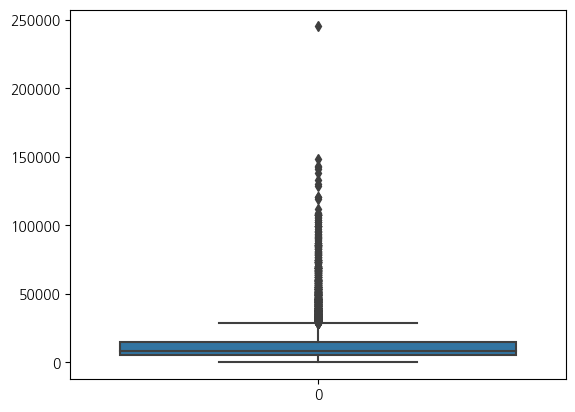

In [35]:
sns.boxplot(df_train['Price'])

In [36]:
df_train.drop(df_train[df_train['Price']>160000].index, inplace=True) # Ï£ºÌñâÍ±∞Î¶¨ Ïù¥ÏÉÅÏπò Ï†úÍ±∞

<Axes: >

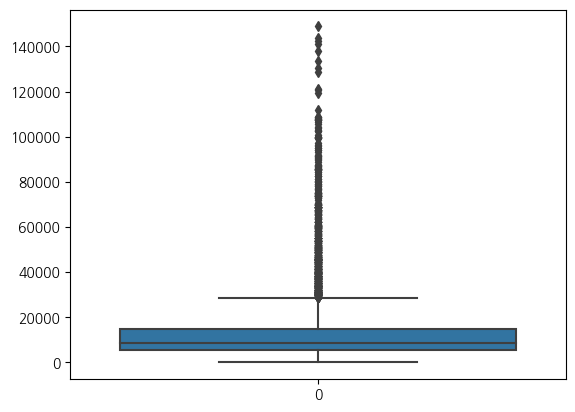

In [37]:
sns.boxplot(df_train['Price'])

In [38]:
df_train.drop(columns="Name", inplace=True) # Ïù¥Î¶Ñ Î≥ÄÏàò Ï†úÍ±∞

<Axes: >

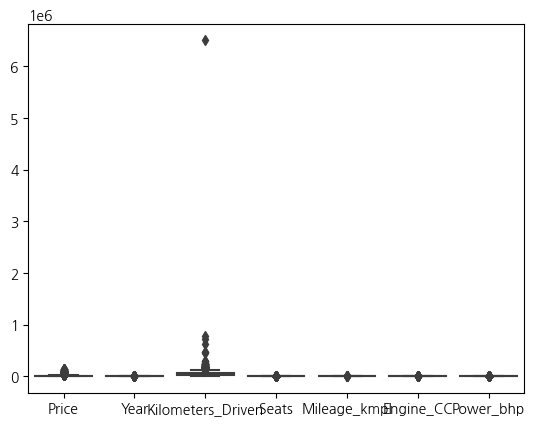

In [39]:
sns.boxplot(df_train)

<Axes: xlabel='Kilometers_Driven'>

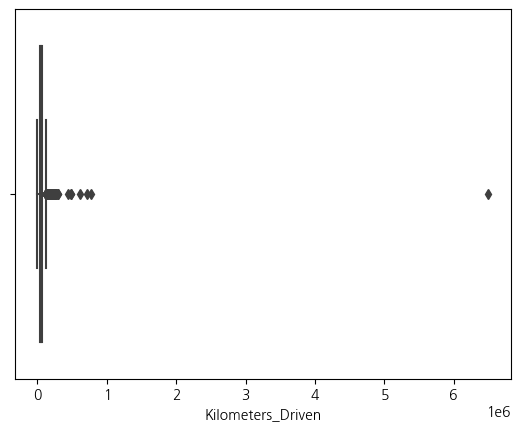

In [40]:
sns.boxplot(x="Kilometers_Driven", data=df_train)

In [41]:
df_train.drop(df_train[df_train['Kilometers_Driven']>3000000].index, inplace=True) # Ï£ºÌñâÍ±∞Î¶¨ Ïù¥ÏÉÅÏπò Ï†úÍ±∞

<Axes: xlabel='Kilometers_Driven'>

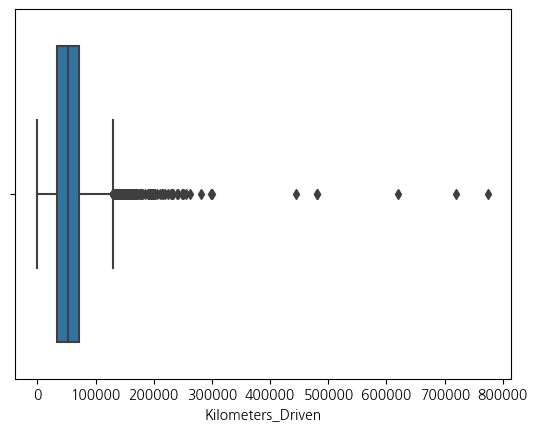

In [42]:
sns.boxplot(x="Kilometers_Driven", data=df_train)

<Axes: xlabel='Price', ylabel='Count'>

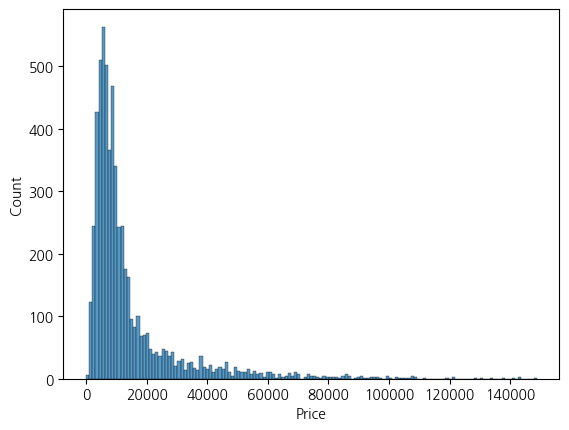

In [43]:
sns.histplot(x="Price", data=df_train) # Î≥ÄÌôò ÌïÑÏöîÌï¥ Î≥¥ÏûÑ

### ÌååÏÉùÎ≥ÄÏàò Ï∂îÍ∞Ä

In [44]:
df_train['Brand'].value_counts()

Maruti           1217
Hyundai          1117
Honda             609
Toyota            415
Volkswagen        320
Mercedes-Benz     307
Ford              297
Mahindra          277
BMW               272
Audi              239
Tata              193
Skoda             176
Renault           151
Chevrolet         119
Nissan             93
Land               50
Name: Brand, dtype: int64

In [45]:
df_train.loc[df_train['Year']<=2012,'Year_cat'] = "2012Ïù¥Ï†Ñ"
df_train.loc[df_train['Year']>2012,'Year_cat'] = "2012Ïù¥ÌõÑ"

In [46]:
df_train.loc[df_train['Engine_CC']<1000,'car_cat'] = "Í≤ΩÏ∞®"
df_train.loc[(df_train['Engine_CC']>=1000) & (df_train['Engine_CC']<1600),'car_cat'] = "ÏÜåÌòï"
df_train.loc[(df_train['Engine_CC']>=1600) & (df_train['Engine_CC']<2000),'car_cat'] = "Ï§ëÌòï"
df_train.loc[df_train['Engine_CC']>=2000,'car_cat'] = "ÎåÄÌòï"

In [47]:
df_train['Ïó∞Ïãù'] = 2020 - df_train['Year']

In [48]:
year_mean=df_train.groupby(['Ïó∞Ïãù'])['Price'].mean().round(3).reset_index()
year_mean.columns = ['Ïó∞Ïãù', 'Ïó∞Ïãù_mean']

In [49]:
df_train=pd.merge(df_train, year_mean, on="Ïó∞Ïãù", how='left')
df_train

Location     Price  Year  Kilometers_Driven Fuel_Type Transmission  \
0         Mumbai   2682.68  2010              72000       CNG       Manual   
1           Pune  19162.00  2015              41000    Diesel       Manual   
2        Chennai   6898.32  2011              46000    Petrol       Manual   
3        Chennai   9197.76  2012              87000    Diesel       Manual   
4     Coimbatore  27194.71  2013              40670    Diesel    Automatic   
...          ...       ...   ...                ...       ...          ...   
5847  Coimbatore  19437.93  2018              31542    Petrol       Manual   
5848        Pune  10822.70  2016              41413    Diesel       Manual   
5849       Kochi  13474.72  2017              39015    Petrol       Manual   
5850       Kochi  16203.39  2017              21380    Diesel       Manual   
5851       Kochi      7.08  2018              23955    Petrol       Manual   

     Owner_Type  Seats  Mileage_kmpl  Engine_CC  Power_bhp    Brand Year_cat  \
0         First    5.0         26.60      998.0      58.16   Maruti   2012Ïù¥Ï†Ñ   
1         First    5.0         19.67     1582.0     126.20  Hyundai   2012Ïù¥ÌõÑ   
2         First    5.0         18.20     1199.0      88.70    Honda   2012Ïù¥Ï†Ñ   
3         First    7.0         20.77     1248.0      88.76   Maruti   2012Ïù¥Ï†Ñ   
4        Second    5.0         15.20     1968.0     140.80     Audi   2012Ïù¥ÌõÑ   
...         ...    ...           ...        ...        ...      ...      ...   
5847      First    5.0         17.40     1497.0     117.30    Honda   2012Ïù¥ÌõÑ   
5848      First    5.0         27.28     1047.0      69.00     Tata   2012Ïù¥ÌõÑ   
5849      First    5.0         17.00     1497.0     121.36     Ford   2012Ïù¥ÌõÑ   
5850      First    5.0         24.30     1248.0      88.50   Maruti   2012Ïù¥ÌõÑ   
5851      First    5.0         18.60     1197.0      81.86  Hyundai   2012Ïù¥ÌõÑ   

     car_cat  Ïó∞Ïãù    Ïó∞Ïãù_mean  
0         Í≤ΩÏ∞®  10   8089.378  
1         ÏÜåÌòï   5  15921.566  
2         ÏÜåÌòï   9  10227.566  
3         ÏÜåÌòï   8  10805.414  
4         Ï§ëÌòï   7  12459.628  
...      ...  ..        ...  
5847      ÏÜåÌòï   2  23122.351  
5848      ÏÜåÌòï   4  17718.594  
5849      ÏÜåÌòï   3  20345.072  
5850      ÏÜåÌòï   3  20345.072  
5851      ÏÜåÌòï   2  23122.351  

[5852 rows x 16 columns]

In [50]:
df_train.loc[(df_train['Kilometers_Driven']/df_train['Ïó∞Ïãù'])>12000, 'Í∞ÄÏÑ±ÎπÑ']='bad'
df_train.loc[(df_train['Kilometers_Driven']/df_train['Ïó∞Ïãù'])<=12000, 'Í∞ÄÏÑ±ÎπÑ']='good'
df_train

Location     Price  Year  Kilometers_Driven Fuel_Type Transmission  \
0         Mumbai   2682.68  2010              72000       CNG       Manual   
1           Pune  19162.00  2015              41000    Diesel       Manual   
2        Chennai   6898.32  2011              46000    Petrol       Manual   
3        Chennai   9197.76  2012              87000    Diesel       Manual   
4     Coimbatore  27194.71  2013              40670    Diesel    Automatic   
...          ...       ...   ...                ...       ...          ...   
5847  Coimbatore  19437.93  2018              31542    Petrol       Manual   
5848        Pune  10822.70  2016              41413    Diesel       Manual   
5849       Kochi  13474.72  2017              39015    Petrol       Manual   
5850       Kochi  16203.39  2017              21380    Diesel       Manual   
5851       Kochi      7.08  2018              23955    Petrol       Manual   

     Owner_Type  Seats  Mileage_kmpl  Engine_CC  Power_bhp    Brand Year_cat  \
0         First    5.0         26.60      998.0      58.16   Maruti   2012Ïù¥Ï†Ñ   
1         First    5.0         19.67     1582.0     126.20  Hyundai   2012Ïù¥ÌõÑ   
2         First    5.0         18.20     1199.0      88.70    Honda   2012Ïù¥Ï†Ñ   
3         First    7.0         20.77     1248.0      88.76   Maruti   2012Ïù¥Ï†Ñ   
4        Second    5.0         15.20     1968.0     140.80     Audi   2012Ïù¥ÌõÑ   
...         ...    ...           ...        ...        ...      ...      ...   
5847      First    5.0         17.40     1497.0     117.30    Honda   2012Ïù¥ÌõÑ   
5848      First    5.0         27.28     1047.0      69.00     Tata   2012Ïù¥ÌõÑ   
5849      First    5.0         17.00     1497.0     121.36     Ford   2012Ïù¥ÌõÑ   
5850      First    5.0         24.30     1248.0      88.50   Maruti   2012Ïù¥ÌõÑ   
5851      First    5.0         18.60     1197.0      81.86  Hyundai   2012Ïù¥ÌõÑ   

     car_cat  Ïó∞Ïãù    Ïó∞Ïãù_mean   Í∞ÄÏÑ±ÎπÑ  
0         Í≤ΩÏ∞®  10   8089.378  good  
1         ÏÜåÌòï   5  15921.566  good  
2         ÏÜåÌòï   9  10227.566  good  
3         ÏÜåÌòï   8  10805.414  good  
4         Ï§ëÌòï   7  12459.628  good  
...      ...  ..        ...   ...  
5847      ÏÜåÌòï   2  23122.351   bad  
5848      ÏÜåÌòï   4  17718.594  good  
5849      ÏÜåÌòï   3  20345.072   bad  
5850      ÏÜåÌòï   3  20345.072  good  
5851      ÏÜåÌòï   2  23122.351  good  

[5852 rows x 17 columns]

In [51]:
df_train

Location     Price  Year  Kilometers_Driven Fuel_Type Transmission  \
0         Mumbai   2682.68  2010              72000       CNG       Manual   
1           Pune  19162.00  2015              41000    Diesel       Manual   
2        Chennai   6898.32  2011              46000    Petrol       Manual   
3        Chennai   9197.76  2012              87000    Diesel       Manual   
4     Coimbatore  27194.71  2013              40670    Diesel    Automatic   
...          ...       ...   ...                ...       ...          ...   
5847  Coimbatore  19437.93  2018              31542    Petrol       Manual   
5848        Pune  10822.70  2016              41413    Diesel       Manual   
5849       Kochi  13474.72  2017              39015    Petrol       Manual   
5850       Kochi  16203.39  2017              21380    Diesel       Manual   
5851       Kochi      7.08  2018              23955    Petrol       Manual   

     Owner_Type  Seats  Mileage_kmpl  Engine_CC  Power_bhp    Brand Year_cat  \
0         First    5.0         26.60      998.0      58.16   Maruti   2012Ïù¥Ï†Ñ   
1         First    5.0         19.67     1582.0     126.20  Hyundai   2012Ïù¥ÌõÑ   
2         First    5.0         18.20     1199.0      88.70    Honda   2012Ïù¥Ï†Ñ   
3         First    7.0         20.77     1248.0      88.76   Maruti   2012Ïù¥Ï†Ñ   
4        Second    5.0         15.20     1968.0     140.80     Audi   2012Ïù¥ÌõÑ   
...         ...    ...           ...        ...        ...      ...      ...   
5847      First    5.0         17.40     1497.0     117.30    Honda   2012Ïù¥ÌõÑ   
5848      First    5.0         27.28     1047.0      69.00     Tata   2012Ïù¥ÌõÑ   
5849      First    5.0         17.00     1497.0     121.36     Ford   2012Ïù¥ÌõÑ   
5850      First    5.0         24.30     1248.0      88.50   Maruti   2012Ïù¥ÌõÑ   
5851      First    5.0         18.60     1197.0      81.86  Hyundai   2012Ïù¥ÌõÑ   

     car_cat  Ïó∞Ïãù    Ïó∞Ïãù_mean   Í∞ÄÏÑ±ÎπÑ  
0         Í≤ΩÏ∞®  10   8089.378  good  
1         ÏÜåÌòï   5  15921.566  good  
2         ÏÜåÌòï   9  10227.566  good  
3         ÏÜåÌòï   8  10805.414  good  
4         Ï§ëÌòï   7  12459.628  good  
...      ...  ..        ...   ...  
5847      ÏÜåÌòï   2  23122.351   bad  
5848      ÏÜåÌòï   4  17718.594  good  
5849      ÏÜåÌòï   3  20345.072   bad  
5850      ÏÜåÌòï   3  20345.072  good  
5851      ÏÜåÌòï   2  23122.351  good  

[5852 rows x 17 columns]

<Axes: xlabel='Mileage_kmpl'>

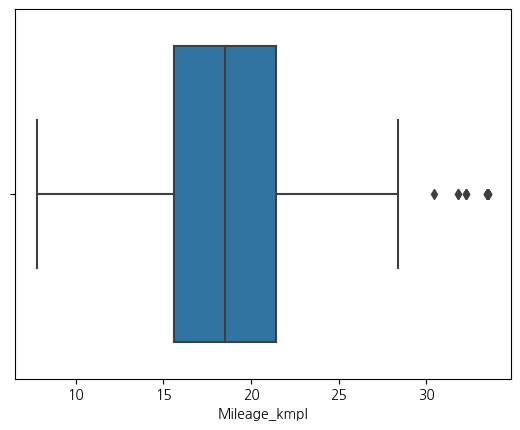

In [52]:
sns.boxplot(x="Mileage_kmpl",data=df_train)

In [53]:
df_train.loc[(df_train['Mileage_kmpl']>=15), 'Mil_cat'] = '1Îì±Í∏â' # Ïó∞ÎπÑÍ∞Ä 15Ïù¥ÏÉÅÏù¥Î©¥ 1Îì±Í∏â
df_train.loc[(df_train['Mileage_kmpl']<15), 'Mil_cat'] = '2Îì±Í∏â Ïù¥Ìïò' #Ïó∞ÎπÑÍ∞Ä 15ÎØ∏ÎßåÏù¥Î©¥ 2Îì±Í∏â Ïù¥Ìïò
df_train.head(3)

Location     Price  Year  Kilometers_Driven Fuel_Type Transmission  \
0   Mumbai   2682.68  2010              72000       CNG       Manual   
1     Pune  19162.00  2015              41000    Diesel       Manual   
2  Chennai   6898.32  2011              46000    Petrol       Manual   

  Owner_Type  Seats  Mileage_kmpl  Engine_CC  Power_bhp    Brand Year_cat  \
0      First    5.0         26.60      998.0      58.16   Maruti   2012Ïù¥Ï†Ñ   
1      First    5.0         19.67     1582.0     126.20  Hyundai   2012Ïù¥ÌõÑ   
2      First    5.0         18.20     1199.0      88.70    Honda   2012Ïù¥Ï†Ñ   

  car_cat  Ïó∞Ïãù    Ïó∞Ïãù_mean   Í∞ÄÏÑ±ÎπÑ Mil_cat  
0      Í≤ΩÏ∞®  10   8089.378  good     1Îì±Í∏â  
1      ÏÜåÌòï   5  15921.566  good     1Îì±Í∏â  
2      ÏÜåÌòï   9  10227.566  good     1Îì±Í∏â

In [54]:
# # Ïó∞ÎπÑ Í∑∏Î£π 3Í∞úÎ°ú ÎÇòÎàî
# df_train['Mileage_Group'] = pd.cut(df_train['Mileage_kmpl'], bins=3, labels=['Low', 'Medium', 'High'])
# grouped = df_train.groupby('Mileage_Group')['Price'].mean().round(3).reset_index() 
# grouped.columns = ['Mileage_Group', 'Mileage_Group_mean']
 
# df_train=pd.merge(df_train, grouped, on="Mileage_Group", how='left')
# df_train

In [55]:
grouped = df_train.groupby('Mil_cat')['Price'].mean().round(3).reset_index() # 2Í∞ú Îì±Í∏âÏúºÎ°ú ÎÇòÎàî
grouped.columns = ['Mil_cat', 'Mil_cat_mean']
 
df_train=pd.merge(df_train, grouped, on="Mil_cat", how='left')
df_train

Location     Price  Year  Kilometers_Driven Fuel_Type Transmission  \
0         Mumbai   2682.68  2010              72000       CNG       Manual   
1           Pune  19162.00  2015              41000    Diesel       Manual   
2        Chennai   6898.32  2011              46000    Petrol       Manual   
3        Chennai   9197.76  2012              87000    Diesel       Manual   
4     Coimbatore  27194.71  2013              40670    Diesel    Automatic   
...          ...       ...   ...                ...       ...          ...   
5847  Coimbatore  19437.93  2018              31542    Petrol       Manual   
5848        Pune  10822.70  2016              41413    Diesel       Manual   
5849       Kochi  13474.72  2017              39015    Petrol       Manual   
5850       Kochi  16203.39  2017              21380    Diesel       Manual   
5851       Kochi      7.08  2018              23955    Petrol       Manual   

     Owner_Type  Seats  Mileage_kmpl  Engine_CC  Power_bhp    Brand Year_cat  \
0         First    5.0         26.60      998.0      58.16   Maruti   2012Ïù¥Ï†Ñ   
1         First    5.0         19.67     1582.0     126.20  Hyundai   2012Ïù¥ÌõÑ   
2         First    5.0         18.20     1199.0      88.70    Honda   2012Ïù¥Ï†Ñ   
3         First    7.0         20.77     1248.0      88.76   Maruti   2012Ïù¥Ï†Ñ   
4        Second    5.0         15.20     1968.0     140.80     Audi   2012Ïù¥ÌõÑ   
...         ...    ...           ...        ...        ...      ...      ...   
5847      First    5.0         17.40     1497.0     117.30    Honda   2012Ïù¥ÌõÑ   
5848      First    5.0         27.28     1047.0      69.00     Tata   2012Ïù¥ÌõÑ   
5849      First    5.0         17.00     1497.0     121.36     Ford   2012Ïù¥ÌõÑ   
5850      First    5.0         24.30     1248.0      88.50   Maruti   2012Ïù¥ÌõÑ   
5851      First    5.0         18.60     1197.0      81.86  Hyundai   2012Ïù¥ÌõÑ   

     car_cat  Ïó∞Ïãù    Ïó∞Ïãù_mean   Í∞ÄÏÑ±ÎπÑ Mil_cat  Mil_cat_mean  
0         Í≤ΩÏ∞®  10   8089.378  good     1Îì±Í∏â     11458.408  
1         ÏÜåÌòï   5  15921.566  good     1Îì±Í∏â     11458.408  
2         ÏÜåÌòï   9  10227.566  good     1Îì±Í∏â     11458.408  
3         ÏÜåÌòï   8  10805.414  good     1Îì±Í∏â     11458.408  
4         Ï§ëÌòï   7  12459.628  good     1Îì±Í∏â     11458.408  
...      ...  ..        ...   ...     ...           ...  
5847      ÏÜåÌòï   2  23122.351   bad     1Îì±Í∏â     11458.408  
5848      ÏÜåÌòï   4  17718.594  good     1Îì±Í∏â     11458.408  
5849      ÏÜåÌòï   3  20345.072   bad     1Îì±Í∏â     11458.408  
5850      ÏÜåÌòï   3  20345.072  good     1Îì±Í∏â     11458.408  
5851      ÏÜåÌòï   2  23122.351  good     1Îì±Í∏â     11458.408  

[5852 rows x 19 columns]

In [56]:
# Í≤ΩÏ†ú ÏàòÏ§ÄÏóê Îî∞Îùº Íµ¨Î∂Ñ

df_train.loc[df_train['Location']=='Mumbai', 'Location_cat'] = 'high'  
df_train.loc[df_train['Location']=='Hyderabad', 'Location_cat'] = 'high'

df_train.loc[df_train['Location']=='Coimbatore', 'Location_cat'] = 'medium'
df_train.loc[df_train['Location']=='Kochi', 'Location_cat'] = 'medium'
df_train.loc[df_train['Location']=='Pune', 'Location_cat'] = 'medium'
df_train.loc[df_train['Location']=='Delhi', 'Location_cat'] = 'medium'

df_train.loc[df_train['Location']=='Kolkata', 'Location_cat'] = 'low'
df_train.loc[df_train['Location']=='Chennai', 'Location_cat'] = 'low'
df_train.loc[df_train['Location']=='Jaipur', 'Location_cat'] = 'low'
df_train.loc[df_train['Location']=='Bangalore', 'Location_cat'] = 'low'
df_train.loc[df_train['Location']=='Ahmedabad', 'Location_cat'] = 'low'

In [57]:
df_train['Year'].value_counts()

2014    777
2016    740
2015    729
2013    634
2017    609
2012    565
2011    456
2010    323
2018    310
2009    193
2008    163
2007    122
2019    102
2006     76
2005     53
Name: Year, dtype: int64

In [58]:
df_train.loc[df_train['Seats']<= 5.0, 'Seats_5'] = '5 Ï¢åÏÑù'  # Ï¢åÏÑù 5, 5ÎØ∏Îßå, 5Ï¥àÍ≥ºÎ°ú Íµ¨Î∂Ñ
df_train.loc[df_train['Seats'] > 5.0, 'Seats_5'] = '5 Ï¥àÍ≥º Ï¢åÏÑù'
df_train.loc[df_train['Seats'] < 5.0, 'Seats_5'] = '5 ÎØ∏Îßå Ï¢åÏÑù'

In [59]:
df_train['new_Year'] = df_train['Year']  # 2010ÎÖÑÎèÑ Ïù¥Ìïò ÏàòÏπòÍ∞Ä Ï†ÅÏñ¥ÏÑú 2010ÎÖÑ Ïù¥ÌïòÎ°ú Î¨∂Ïñ¥ÏÑú new_YearÎ≥ÄÏàò ÏÉùÏÑ±
df_train.loc[df_train['Year'] <= 2010, 'new_Year'] = '2010ÎÖÑ Ïù¥Ìïò'

In [60]:
df_train['new_Year'].value_counts()

2010ÎÖÑ Ïù¥Ìïò    930
2014        777
2016        740
2015        729
2013        634
2017        609
2012        565
2011        456
2018        310
2019        102
Name: new_Year, dtype: int64

## ÌÜµÍ≥Ñ Í≤ÄÏ†ï

<Axes: >

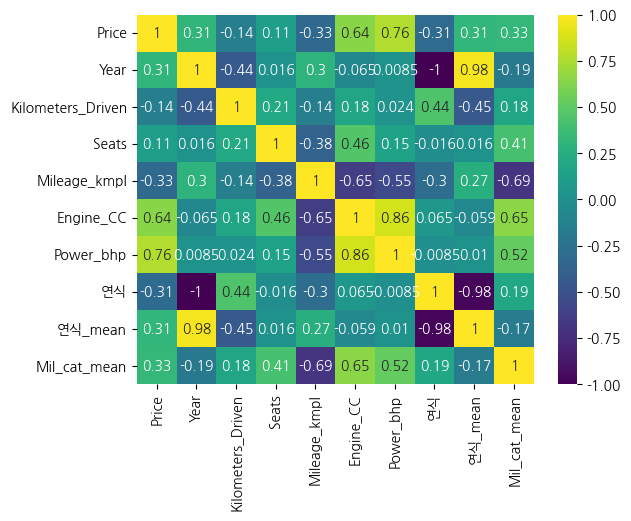

In [61]:
df_corr=df_train.corr()
sns.heatmap(df_corr, annot=True, cmap="viridis")

#### ÌöåÍ∑Ä, Í≤∞Ï†ïÌä∏Î¶¨, ÎûúÎç§Ìè¨Î†àÏä§Ìä∏, Í∑∏ÎûòÎîîÏñ∏Ìä∏Î∂ÄÏä§ÌåÖ, xgboost

In [62]:
df_train_reg = df_train.copy()

df_raw_dummy = pd.get_dummies(df_train_reg, drop_first = True)
df_raw_dummy.head()

train_df, test_df = train_test_split(df_raw_dummy, test_size = 0.3, random_state = 1234) 

In [63]:
import statsmodels.api as sm

# ÌöåÍ∑Ä Î™®Îç∏ Ï†ïÏùò
formula = "Price ~ Kilometers_Driven  +  \
Power_bhp  + C(Owner_Type) + C(Brand) + C(Location) +\
C(Year_cat) + C(car_cat) + C(Mil_cat)  + C(Seats_5) + C(new_Year)"

reg_model = smf.ols(formula=formula, data=df_train_reg)

# ÌöåÍ∑Ä Î™®Îç∏ Ï†ÅÌï©
reg_result = reg_model.fit()

# ÌöåÍ∑Ä Í≤∞Í≥º ÏöîÏïΩ Ï∂úÎ†•
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     434.6
Date:                Sun, 10 Mar 2024   Prob (F-statistic):               0.00
Time:                        15:04:15   Log-Likelihood:                -60724.
No. Observations:                5852   AIC:                         1.215e+05
Df Residuals:                    5806   BIC:                         1.218e+05
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [64]:
# 55 Page
# Îã§Ï§ëÍ≥µÏÑ†ÏÑ± Ïû¨ÌôïÏù∏
df_train_x = df_train_reg[['Kilometers_Driven', 'Power_bhp']]

# statsmodelsÏùò ÏÉÅÏàòÌï≠ Ï∂îÍ∞Ä Ìï®Ïàò Ï†ÅÏö©
df_train_x_const = add_constant(df_train_x) 

# DataFrameÏúºÎ°ú Ï†ÄÏû•
df_vif = pd.DataFrame()
df_vif["Variable"] = df_train_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_train_x_const.values, i) \
                 for i in range(df_train_x_const.shape[1])]

# VIF Ï†ïÎ†¨
df_vif.sort_values("VIF", ascending = True).round(2)

Variable  VIF
1  Kilometers_Driven  1.0
2          Power_bhp  1.0
0              const  8.0

## Year_cat<->Price Kruskal-Wallis Í≤ÄÏ†ï

In [65]:
import pandas as pd
from scipy.stats import kruskal

# ÌäπÏ†ï Ïó∞ÎèÑ Î≤îÏ£ºÏóê Îî∞Î•∏ Í∞ÄÍ≤© Î¶¨Ïä§Ìä∏Î•º Ï§ÄÎπÑ
prices_before_2012 = df_train[df_train['Year_cat'] == '2012Ïù¥Ï†Ñ']['Price'].tolist()
prices_after_2012 = df_train[df_train['Year_cat'] == '2012Ïù¥ÌõÑ']['Price'].tolist()

# Kruskal-Wallis Í≤ÄÏ†ï Ïã§Ïãú
stat, p = kruskal(prices_before_2012, prices_after_2012)

print('Kruskal-Wallis H Í≤ÄÏ†ï ÌÜµÍ≥ÑÎüâ : {:.3f}'.format(stat))
print('p-value : {:.3f}'.format(p))

# Í≤∞Í≥º Ìï¥ÏÑù
if p < 0.05:
    print('2012ÎÖÑ Ïù¥Ï†ÑÍ≥º Ïù¥ÌõÑÏùò Í∞ÄÍ≤© Ï§ëÏïôÍ∞í ÏÇ¨Ïù¥ÏóêÎäî ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Í∞Ä ÏûàÏäµÎãàÎã§.')
else:
    print('ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Í∞Ä ÏóÜÏäµÎãàÎã§.')

Kruskal-Wallis H Í≤ÄÏ†ï ÌÜµÍ≥ÑÎüâ : 997.495
p-value : 0.000
2012ÎÖÑ Ïù¥Ï†ÑÍ≥º Ïù¥ÌõÑÏùò Í∞ÄÍ≤© Ï§ëÏïôÍ∞í ÏÇ¨Ïù¥ÏóêÎäî ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Í∞Ä ÏûàÏäµÎãàÎã§.


## car_cat <-> Price

In [66]:
import pandas as pd
from scipy.stats import kruskal


# Í∞Å ÏûêÎèôÏ∞® ÌÅ¨Í∏∞ Î≤îÏ£ºÏóê Ìï¥ÎãπÌïòÎäî Í∞ÄÍ≤©Ïùò Îç∞Ïù¥ÌÑ∞Î•º Ï§ÄÎπÑ
prices_large = df_train[df_train['car_cat'] == 'ÎåÄÌòï']['Price'].values
prices_small = df_train[df_train['car_cat'] == 'ÏÜåÌòï']['Price'].values
prices_medium = df_train[df_train['car_cat'] == 'Ï§ëÌòï']['Price'].values

# Kruskal-Wallis Í≤ÄÏ†ï Ïã§Ïãú
stat, p = kruskal(prices_large, prices_small, prices_medium)

print('Kruskal-Wallis H Í≤ÄÏ†ï ÌÜµÍ≥ÑÎüâ : {:.3f}'.format(stat))
print('p-value : {:.3f}'.format(p))

# Í≤∞Í≥º Ìï¥ÏÑù
if p < 0.05:
    print('ÏÑ∏ ÏûêÎèôÏ∞® Î≤îÏ£º(ÎåÄÌòï, ÏÜåÌòï, Ï§ëÌòï)Ïùò Í∞ÄÍ≤© Ï§ëÏïôÍ∞í ÏÇ¨Ïù¥ÏóêÎäî ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Í∞Ä ÏûàÏäµÎãàÎã§.üìä')
else:
    print('ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Í∞Ä ÏóÜÏäµÎãàÎã§.ü§î')


Kruskal-Wallis H Í≤ÄÏ†ï ÌÜµÍ≥ÑÎüâ : 1931.811
p-value : 0.000
ÏÑ∏ ÏûêÎèôÏ∞® Î≤îÏ£º(ÎåÄÌòï, ÏÜåÌòï, Ï§ëÌòï)Ïùò Í∞ÄÍ≤© Ï§ëÏïôÍ∞í ÏÇ¨Ïù¥ÏóêÎäî ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Í∞Ä ÏûàÏäµÎãàÎã§.üìä


## Brand <-> price ÎπÑÎ™®ÏàòÌÜµÍ≥Ñ

In [67]:
import pandas as pd
from scipy.stats import kruskal


# Í∞Å ÏûêÎèôÏ∞® ÌÅ¨Í∏∞ Î≤îÏ£ºÏóê Ìï¥ÎãπÌïòÎäî Í∞ÄÍ≤©Ïùò Îç∞Ïù¥ÌÑ∞Î•º Ï§ÄÎπÑ
prices_1 = df_train[df_train['Brand'] == 'Maruti']['Price'].values
prices_2 = df_train[df_train['Brand'] == 'Hyundai']['Price'].values
prices_3 = df_train[df_train['Brand'] == 'Honda']['Price'].values
prices_4 = df_train[df_train['Brand'] == 'Toyota']['Price'].values
prices_5 = df_train[df_train['Brand'] == 'Volkswagen']['Price'].values
prices_6 = df_train[df_train['Brand'] == 'Mercedes-Benz']['Price'].values
prices_7 = df_train[df_train['Brand'] == 'Ford']['Price'].values
prices_8 = df_train[df_train['Brand'] == 'Mahindra']['Price'].values
prices_9 = df_train[df_train['Brand'] == 'BMW']['Price'].values
prices_10 = df_train[df_train['Brand'] == 'Audi']['Price'].values
prices_11 = df_train[df_train['Brand'] == 'Tata']['Price'].values
prices_12 = df_train[df_train['Brand'] == 'Skoda']['Price'].values
prices_13 = df_train[df_train['Brand'] == 'Renault']['Price'].values
prices_14 = df_train[df_train['Brand'] == 'Chevrolet']['Price'].values
prices_15 = df_train[df_train['Brand'] == 'Nissan']['Price'].values
prices_16 = df_train[df_train['Brand'] == 'Land']['Price'].values

# Kruskal-Wallis Í≤ÄÏ†ï Ïã§Ïãú
stat, p = kruskal(prices_1 ,prices_2 ,prices_3 ,prices_4 
,prices_5 ,prices_6 ,prices_7 ,prices_8 
,prices_9 ,prices_10,prices_11,prices_12
,prices_13,prices_14,prices_15,prices_16)

print('Kruskal-Wallis H Í≤ÄÏ†ï ÌÜµÍ≥ÑÎüâ : {:.3f}'.format(stat))
print('p-value : {:.3f}'.format(p))

# Í≤∞Í≥º Ìï¥ÏÑù
if p < 0.05:
    print('ÏÑ∏ ÏûêÎèôÏ∞® Î≤îÏ£º(ÎåÄÌòï, ÏÜåÌòï, Ï§ëÌòï)Ïùò Í∞ÄÍ≤© Ï§ëÏïôÍ∞í ÏÇ¨Ïù¥ÏóêÎäî ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Í∞Ä ÏûàÏäµÎãàÎã§.üìä')
else:
    print('ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Í∞Ä ÏóÜÏäµÎãàÎã§.ü§î')


Kruskal-Wallis H Í≤ÄÏ†ï ÌÜµÍ≥ÑÎüâ : 2585.462
p-value : 0.000
ÏÑ∏ ÏûêÎèôÏ∞® Î≤îÏ£º(ÎåÄÌòï, ÏÜåÌòï, Ï§ëÌòï)Ïùò Í∞ÄÍ≤© Ï§ëÏïôÍ∞í ÏÇ¨Ïù¥ÏóêÎäî ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Í∞Ä ÏûàÏäµÎãàÎã§.üìä


## Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞ 

### Year_cat<->Price

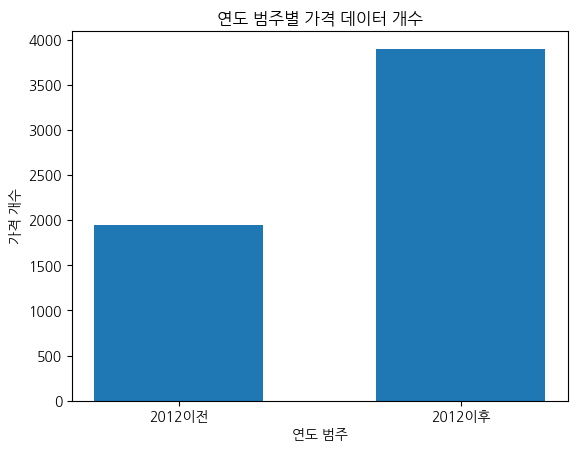

In [68]:
import matplotlib.pyplot as plt

# '2012Ïù¥Ï†Ñ'Í≥º '2012Ïù¥ÌõÑ'Ïùò Í∞ÄÍ≤© Îç∞Ïù¥ÌÑ∞Î•º ÎßâÎåÄÍ∑∏ÎûòÌîÑÎ°ú ÎÇòÌÉÄÎÇ¥Í∏∞ ÏúÑÌïú Îç∞Ïù¥ÌÑ∞Î•º Ï§ÄÎπÑÌï©ÎãàÎã§.
labels = ['2012Ïù¥Ï†Ñ', '2012Ïù¥ÌõÑ']
prices = [prices_before_2012, prices_after_2012]

# Í∑∏ÎûòÌîÑÏùò ÏúÑÏπòÎ•º ÏßÄÏ†ïÌï† xÏ∂ï Ï¢åÌëúÎ•º ÏÉùÏÑ±Ìï©ÎãàÎã§.
x = range(len(labels))

# ÎßâÎåÄÍ∑∏ÎûòÌîÑÎ•º Í∑∏Î¶ΩÎãàÎã§.
plt.bar(x, [len(prices_before_2012), len(prices_after_2012)], width=0.6, align='center')
plt.xticks(x, labels)

# Í∑∏ÎûòÌîÑÏóê Î†àÏù¥Î∏îÍ≥º Ï†úÎ™©ÏùÑ Ï∂îÍ∞ÄÌï©ÎãàÎã§.
plt.xlabel('Ïó∞ÎèÑ Î≤îÏ£º')
plt.ylabel('Í∞ÄÍ≤© Í∞úÏàò')
plt.title('Ïó∞ÎèÑ Î≤îÏ£ºÎ≥Ñ Í∞ÄÍ≤© Îç∞Ïù¥ÌÑ∞ Í∞úÏàò')

# Í∑∏ÎûòÌîÑÎ•º ÌôîÎ©¥Ïóê ÌëúÏãúÌï©ÎãàÎã§.
plt.show()

<Axes: xlabel='Year_cat', ylabel='count'>

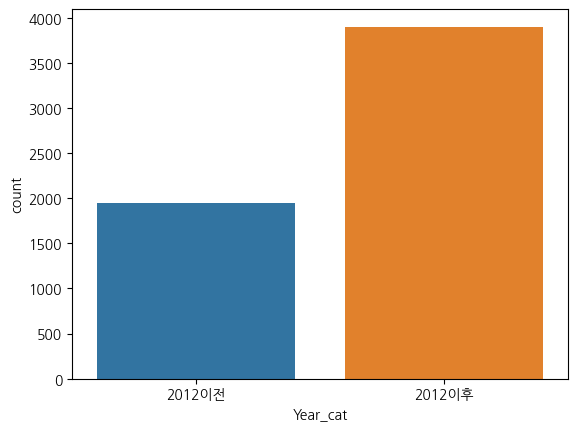

In [69]:
sns.countplot(x='Year_cat',data=df_train)

### car_cat <-> Price

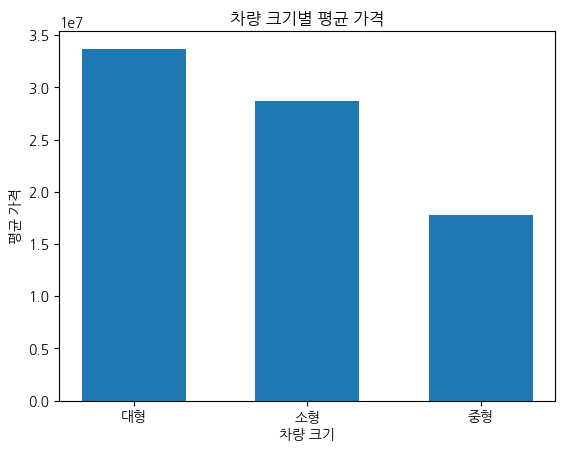

In [70]:
# ÎßâÎåÄ Í∑∏ÎûòÌîÑÎ•º Í∑∏Î¶¨Í∏∞ ÏúÑÌïú Î†àÏù¥Î∏îÍ≥º Í∞í ÏÑ§Ï†ï
labels = ['ÎåÄÌòï', 'ÏÜåÌòï', 'Ï§ëÌòï']
values = [sum(prices_large), sum(prices_small), sum(prices_medium)]

# XÏ∂ï ÏúÑÏπò ÏÑ§Ï†ï
x = range(len(labels))

# ÎßâÎåÄ Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plt.bar(x, values, width=0.6, align='center')

# XÏ∂ïÏóê Î†àÏù¥Î∏î ÏÑ§Ï†ï
plt.xticks(x, labels)

# Í∑∏ÎûòÌîÑ Ï†úÎ™© Î∞è Ï∂ï Ïù¥Î¶Ñ ÏÑ§Ï†ï
plt.title('Ï∞®Îüâ ÌÅ¨Í∏∞Î≥Ñ ÌèâÍ∑† Í∞ÄÍ≤©')
plt.xlabel('Ï∞®Îüâ ÌÅ¨Í∏∞')
plt.ylabel('ÌèâÍ∑† Í∞ÄÍ≤©')

# Í∑∏ÎûòÌîÑ ÌëúÏãú
plt.show()

### Brand <-> price 

<Axes: xlabel='Brand', ylabel='count'>

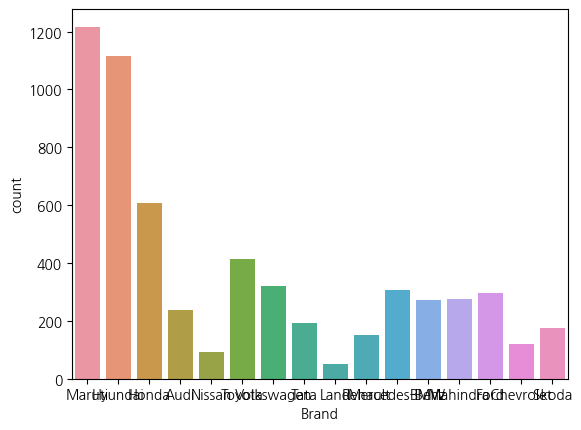

In [71]:
sns.countplot(x='Brand',data=df_train)

## Îã§Ï§ëÏÑ†ÌòïÌöåÍ∑ÄÎ∂ÑÏÑù

In [72]:
# 45 Page
# Îç∞Ïù¥ÌÑ∞ Íµ¨ÏÑ±:Series, DataFrame
import pandas as pd
# ÌñâÎ†¨ Ïó∞ÏÇ∞
import numpy as np 
# Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôî
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# ÏÑ†Ìòï ÌöåÍ∑ÄÎ™®Îç∏ formula(y ~ X1 + X2 + ...)
import statsmodels.formula.api as smf
# ÏûîÏ∞®Ïùò Ï†ïÍ∑úÏÑ± ÌôïÏù∏ :qqplot, ÌöåÍ∑ÄÎ∂ÑÏÑùÏùò ÏÉÅÏàòÌï≠ Ï∂îÍ∞Ä : add_constant
from statsmodels.api import qqplot, add_constant
# Îã§Ï§ëÍ≥µÏÑ†ÏÑ± ÌôïÏù∏
from statsmodels.stats.outliers_influence import variance_inflation_factor
# ÌïôÏäµÏö©/ÌèâÍ∞ÄÏö© Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨:train, test
from sklearn.model_selection import train_test_split
# ÏÑ†ÌòïÌöåÍ∑ÄÎ™®Ìòï
from sklearn.linear_model import LinearRegression
# Î≥ÄÏàò ÏÑ†ÌÉùÎ≤ï(ÌõÑÏßÑÏ†úÍ±∞Î≤ï)
from sklearn.feature_selection import RFE
# Scale Î≥ÄÌôò->ÌëúÏ§ÄÌôî ÌöåÍ∑ÄÍ≥ÑÏàò ÏÇ∞Ï∂ú
from sklearn.preprocessing import StandardScaler
# ÌèâÍ∞ÄÌï®Ïàò
from sklearn.metrics import r2_score

In [73]:
# 46 Page
# ÎßëÏùÄ Í≥†Îîï Ï†ÅÏö©
matplotlib.rc("font", family = "NanumGothic")
# ÏùåÏàò ÌëúÏãú
matplotlib.rc("axes", unicode_minus = False)

In [74]:
df_train.isnull().sum()

Location             0
Price                0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Seats                0
Mileage_kmpl         0
Engine_CC            0
Power_bhp            0
Brand                0
Year_cat             0
car_cat              0
Ïó∞Ïãù                   0
Ïó∞Ïãù_mean              0
Í∞ÄÏÑ±ÎπÑ                  0
Mil_cat              0
Mil_cat_mean         0
Location_cat         0
Seats_5              0
new_Year             0
dtype: int64

In [75]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5852 entries, 0 to 5851
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           5852 non-null   object 
 1   Price              5852 non-null   float64
 2   Year               5852 non-null   int64  
 3   Kilometers_Driven  5852 non-null   int64  
 4   Fuel_Type          5852 non-null   object 
 5   Transmission       5852 non-null   object 
 6   Owner_Type         5852 non-null   object 
 7   Seats              5852 non-null   float64
 8   Mileage_kmpl       5852 non-null   float64
 9   Engine_CC          5852 non-null   float64
 10  Power_bhp          5852 non-null   float64
 11  Brand              5852 non-null   object 
 12  Year_cat           5852 non-null   object 
 13  car_cat            5852 non-null   object 
 14  Ïó∞Ïãù                 5852 non-null   int64  
 15  Ïó∞Ïãù_mean            5852 non-null   float64
 16  Í∞ÄÏÑ±ÎπÑ       

In [76]:
df_train.columns

Index(['Location', 'Price', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Seats', 'Mileage_kmpl', 'Engine_CC',
       'Power_bhp', 'Brand', 'Year_cat', 'car_cat', 'Ïó∞Ïãù', 'Ïó∞Ïãù_mean', 'Í∞ÄÏÑ±ÎπÑ',
       'Mil_cat', 'Mil_cat_mean', 'Location_cat', 'Seats_5', 'new_Year'],
      dtype='object')

In [77]:
# # Î≤îÏ£ºÌòï Î≥ÄÏàòÏùò Dummy Î≥ÄÏàòÌôî
# df_raw_dummy = pd.get_dummies(df_train, drop_first = True)
# df_raw_dummy.head()

In [78]:
# df_raw_dummy.columns

In [79]:
# # ÏÇ∞Ï†êÎèÑ ÌñâÎ†¨:Î™©ÌëúÎ≥ÄÏàòÏôÄ ÏÑ§Î™ÖÎ≥ÄÏàò ÏßÄÏ†ï
# sns.pairplot(df_raw_dummy, y_vars="Price", x_vars=['Price', 'Year', 'Kilometers_Driven', 'Seats', 'Mileage_kmpl'],kind="reg")

In [80]:
# # ÏÇ∞Ï†êÎèÑ ÌñâÎ†¨:Î™©ÌëúÎ≥ÄÏàòÏôÄ ÏÑ§Î™ÖÎ≥ÄÏàò ÏßÄÏ†ï
# sns.pairplot(df_raw_dummy, y_vars="Price", x_vars=['Engine_CC', 'Power_bhp', 'Ïó∞Ïãù', 'Ïó∞Ïãù_mean', 'Mil_cat_mean'],kind="reg")

In [81]:
# # ÏÇ∞Ï†êÎèÑ ÌñâÎ†¨:Î™©ÌëúÎ≥ÄÏàòÏôÄ ÏÑ§Î™ÖÎ≥ÄÏàò ÏßÄÏ†ï
# sns.pairplot(df_raw_dummy, y_vars="Price", x_vars=['Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
#        'Location_Delhi', 'Location_Hyderabad'],kind="reg")

In [82]:
# # ÏÇ∞Ï†êÎèÑ ÌñâÎ†¨:Î™©ÌëúÎ≥ÄÏàòÏôÄ ÏÑ§Î™ÖÎ≥ÄÏàò ÏßÄÏ†ï
# sns.pairplot(df_raw_dummy, y_vars="Price", x_vars=['Location_Jaipur',
#        'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai',
#        'Location_Pune'],kind="reg")

In [83]:
# # ÏÇ∞Ï†êÎèÑ ÌñâÎ†¨:Î™©ÌëúÎ≥ÄÏàòÏôÄ ÏÑ§Î™ÖÎ≥ÄÏàò ÏßÄÏ†ï
# sns.pairplot(df_raw_dummy, y_vars="Price", x_vars=['Fuel_Type_Diesel', 'Fuel_Type_LPG',
#        'Fuel_Type_Petrol'],kind="reg")

In [84]:
# # ÏÇ∞Ï†êÎèÑ ÌñâÎ†¨:Î™©ÌëúÎ≥ÄÏàòÏôÄ ÏÑ§Î™ÖÎ≥ÄÏàò ÏßÄÏ†ï
# sns.pairplot(df_raw_dummy, y_vars="Price", x_vars=['Transmission_Manual', 'Owner_Type_Fourth & Above',
#        'Owner_Type_Second', 'Owner_Type_Third'],kind="reg")

In [85]:
# # ÏÇ∞Ï†êÎèÑ ÌñâÎ†¨:Î™©ÌëúÎ≥ÄÏàòÏôÄ ÏÑ§Î™ÖÎ≥ÄÏàò ÏßÄÏ†ï
# sns.pairplot(df_raw_dummy, y_vars="Price", x_vars=['Brand_BMW', 'Brand_Chevrolet',
#        'Brand_Ford', 'Brand_Honda', 'Brand_Hyundai'],kind="reg")

In [86]:
# # ÏÇ∞Ï†êÎèÑ ÌñâÎ†¨:Î™©ÌëúÎ≥ÄÏàòÏôÄ ÏÑ§Î™ÖÎ≥ÄÏàò ÏßÄÏ†ï
# sns.pairplot(df_raw_dummy, y_vars="Price", x_vars=['Brand_Land',
#        'Brand_Mahindra', 'Brand_Maruti', 'Brand_Mercedes-Benz', 'Brand_Nissan'],kind="reg")

In [87]:
# # ÏÇ∞Ï†êÎèÑ ÌñâÎ†¨:Î™©ÌëúÎ≥ÄÏàòÏôÄ ÏÑ§Î™ÖÎ≥ÄÏàò ÏßÄÏ†ï
# sns.pairplot(df_raw_dummy, y_vars="Price", x_vars=['Brand_Renault', 'Brand_Skoda', 'Brand_Tata', 'Brand_Toyota',
#        'Brand_Volkswagen'],kind="reg")

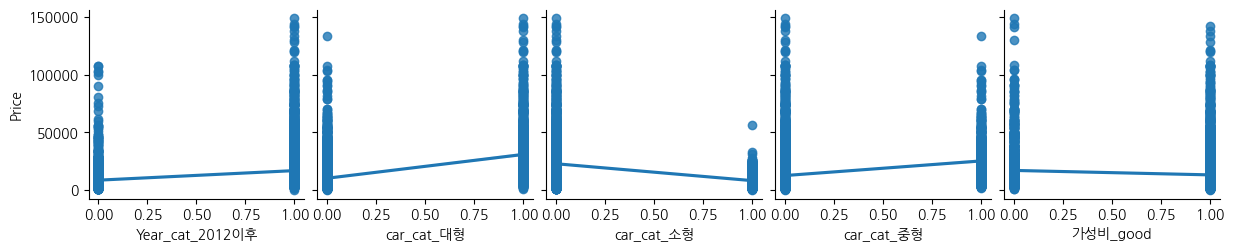

In [88]:
# ÏÇ∞Ï†êÎèÑ ÌñâÎ†¨:Î™©ÌëúÎ≥ÄÏàòÏôÄ ÏÑ§Î™ÖÎ≥ÄÏàò ÏßÄÏ†ï
sns.pairplot(df_raw_dummy, y_vars="Price", x_vars=['Year_cat_2012Ïù¥ÌõÑ', 'car_cat_ÎåÄÌòï', 'car_cat_ÏÜåÌòï',
       'car_cat_Ï§ëÌòï', 'Í∞ÄÏÑ±ÎπÑ_good'],kind="reg")

In [89]:
# # ÏÇ∞Ï†êÎèÑ ÌñâÎ†¨:Î™©ÌëúÎ≥ÄÏàòÏôÄ ÏÑ§Î™ÖÎ≥ÄÏàò ÏßÄÏ†ï
# sns.pairplot(df_raw_dummy, y_vars="Price", x_vars=['Mil_cat_2Îì±Í∏â Ïù¥Ìïò', 'Location_cat_low',
#        'Location_cat_medium', 'Seats_5_5 Ï¢åÏÑù', 'Seats_5_5 Ï¥àÍ≥º Ï¢åÏÑù'],kind="reg")

In [90]:
# # ÏÇ∞Ï†êÎèÑ ÌñâÎ†¨:Î™©ÌëúÎ≥ÄÏàòÏôÄ ÏÑ§Î™ÖÎ≥ÄÏàò ÏßÄÏ†ï
# sns.pairplot(df_raw_dummy, y_vars="Price", x_vars=['new_Year_2012', 'new_Year_2013', 'new_Year_2014', 'new_Year_2015',
#        'new_Year_2016'],kind="reg")

In [91]:
# # ÏÇ∞Ï†êÎèÑ ÌñâÎ†¨:Î™©ÌëúÎ≥ÄÏàòÏôÄ ÏÑ§Î™ÖÎ≥ÄÏàò ÏßÄÏ†ï
# sns.pairplot(df_raw_dummy, y_vars="Price", x_vars=['new_Year_2017', 'new_Year_2018', 'new_Year_2019',
#        'new_Year_2010ÎÖÑ Ïù¥Ìïò'],kind="reg")

In [92]:
# # ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù
# df_raw_dummy.corr().round(3)
# #ÏÉÅÍ¥ÄÍ≥ÑÏàò

In [99]:
# train/test data Î∂ÑÎ¶¨
df_train_1, df_test = train_test_split(df_train, test_size = 0.3, random_state = 1234) 
print("train data size : {}".format(df_train_1.shape))
print("test data size : {}".format(df_test.shape))

train data size : (4096, 22)
test data size : (1756, 22)


In [100]:
df_train_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4096 entries, 1423 to 2863
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           4096 non-null   object 
 1   Price              4096 non-null   float64
 2   Year               4096 non-null   int64  
 3   Kilometers_Driven  4096 non-null   int64  
 4   Fuel_Type          4096 non-null   object 
 5   Transmission       4096 non-null   object 
 6   Owner_Type         4096 non-null   object 
 7   Seats              4096 non-null   float64
 8   Mileage_kmpl       4096 non-null   float64
 9   Engine_CC          4096 non-null   float64
 10  Power_bhp          4096 non-null   float64
 11  Brand              4096 non-null   object 
 12  Year_cat           4096 non-null   object 
 13  car_cat            4096 non-null   object 
 14  Ïó∞Ïãù                 4096 non-null   int64  
 15  Ïó∞Ïãù_mean            4096 non-null   float64
 16  Í∞ÄÏÑ±ÎπÑ    

In [145]:
df_train_1.columns

Index(['Location', 'Price', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Seats', 'Mileage_kmpl', 'Engine_CC',
       'Power_bhp', 'Brand', 'Year_cat', 'car_cat', 'Ïó∞Ïãù', 'Ïó∞Ïãù_mean', 'Í∞ÄÏÑ±ÎπÑ',
       'Mil_cat', 'Mil_cat_mean', 'Location_cat', 'Seats_5', 'new_Year'],
      dtype='object')

In [153]:
# ÏÑ†Ìòï ÌöåÍ∑Ä Î∂ÑÏÑù : formula(y ~ X1 + X2 + ...) Ïù¥Ïö©. 
reg_model = smf.ols(formula = "Price ~ C(Location)+Year+Kilometers_Driven+C(Fuel_Type)+\
                    C(Transmission)+C(Owner_Type)+Seats+Mileage_kmpl+Engine_CC+Power_bhp+C(Brand)+\
                    C(Year_cat)+C(car_cat)+Ïó∞Ïãù+Ïó∞Ïãù_mean+C(Í∞ÄÏÑ±ÎπÑ)+C(Mil_cat)+Mil_cat_mean+C(Location_cat)+\
                    C(Seats_5)+C(new_Year)", data = df_train_1)
# Ï†ÅÌï©
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     264.8
Date:                Sun, 10 Mar 2024   Prob (F-statistic):               0.00
Time:                        16:32:46   Log-Likelihood:                -42422.
No. Observations:                4096   AIC:                         8.496e+04
Df Residuals:                    4040   BIC:                         8.531e+04
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [154]:
#ÏÑ†ÌòïÌöåÍ∑ÄÎ∂ÑÏÑù : Î™®Îç∏ÏóêÏÑú Transmission Ï†úÍ±∞ 
reg_model = smf.ols(formula = "Price ~ C(Location)+Year+Kilometers_Driven+C(Fuel_Type)+\
                    +C(Owner_Type)+Seats+Mileage_kmpl+Engine_CC+Power_bhp+C(Brand)+\
                    C(Year_cat)+C(car_cat)+Ïó∞Ïãù+Ïó∞Ïãù_mean+C(Í∞ÄÏÑ±ÎπÑ)+C(Mil_cat)+Mil_cat_mean+C(Location_cat)+\
                    C(Seats_5)+C(new_Year)", data = df_train_1)
# Ï†ÅÌï©
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     269.8
Date:                Sun, 10 Mar 2024   Prob (F-statistic):               0.00
Time:                        16:33:14   Log-Likelihood:                -42422.
No. Observations:                4096   AIC:                         8.495e+04
Df Residuals:                    4041   BIC:                         8.530e+04
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [158]:
#ÏÑ†ÌòïÌöåÍ∑ÄÎ∂ÑÏÑù : Î™®Îç∏ÏóêÏÑú Í∞ÄÏÑ±ÎπÑ Ï†úÍ±∞ 
reg_model = smf.ols(formula = "Price ~ C(Location)+Year+Kilometers_Driven+C(Fuel_Type)+\
                    +C(Owner_Type)+Seats+Mileage_kmpl+Engine_CC+Power_bhp+C(Brand)+\
                    C(Year_cat)+C(car_cat)+Ïó∞Ïãù+Ïó∞Ïãù_mean+C(Mil_cat)+Mil_cat_mean+C(Location_cat)+\
                    C(Seats_5)+C(new_Year)", data = df_train_1)
# Ï†ÅÌï©
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     274.9
Date:                Sun, 10 Mar 2024   Prob (F-statistic):               0.00
Time:                        16:34:49   Log-Likelihood:                -42422.
No. Observations:                4096   AIC:                         8.495e+04
Df Residuals:                    4042   BIC:                         8.529e+04
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [160]:
#ÏÑ†ÌòïÌöåÍ∑ÄÎ∂ÑÏÑù : Î™®Îç∏ÏóêÏÑú Seats_5 Ï†úÍ±∞ 
reg_model = smf.ols(formula = "Price ~ C(Location)+Year+Kilometers_Driven+C(Fuel_Type)+\
                    +C(Owner_Type)+Seats+Mileage_kmpl+Engine_CC+Power_bhp+C(Brand)+\
                    C(Year_cat)+C(car_cat)+Ïó∞Ïãù+Ïó∞Ïãù_mean+C(Mil_cat)+Mil_cat_mean+C(Location_cat)+\
                    +C(new_Year)", data = df_train_1)
# Ï†ÅÌï©
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     283.6
Date:                Sun, 10 Mar 2024   Prob (F-statistic):               0.00
Time:                        16:36:56   Log-Likelihood:                -42435.
No. Observations:                4096   AIC:                         8.497e+04
Df Residuals:                    4044   BIC:                         8.530e+04
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [161]:
#ÏÑ†ÌòïÌöåÍ∑ÄÎ∂ÑÏÑù : Î™®Îç∏ÏóêÏÑú Owner_Type Ï†úÍ±∞ 
reg_model = smf.ols(formula = "Price ~ C(Location)+Year+Kilometers_Driven+C(Fuel_Type)+\
                    +Seats+Mileage_kmpl+Engine_CC+Power_bhp+C(Brand)+\
                    C(Year_cat)+C(car_cat)+Ïó∞Ïãù+Ïó∞Ïãù_mean+C(Mil_cat)+Mil_cat_mean+C(Location_cat)+\
                    +C(new_Year)", data = df_train_1)
# Ï†ÅÌï©
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     300.4
Date:                Sun, 10 Mar 2024   Prob (F-statistic):               0.00
Time:                        16:38:44   Log-Likelihood:                -42440.
No. Observations:                4096   AIC:                         8.498e+04
Df Residuals:                    4047   BIC:                         8.529e+04
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [162]:
#ÏÑ†ÌòïÌöåÍ∑ÄÎ∂ÑÏÑù : Î™®Îç∏ÏóêÏÑú Fuel_TypeÏ†úÍ±∞ 
reg_model = smf.ols(formula = "Price ~ C(Location)+Year+Kilometers_Driven+\
                    +Seats+Mileage_kmpl+Engine_CC+Power_bhp+C(Brand)+\
                    C(Year_cat)+C(car_cat)+Ïó∞Ïãù+Ïó∞Ïãù_mean+C(Mil_cat)+Mil_cat_mean+C(Location_cat)+\
                    +C(new_Year)", data = df_train_1)
# Ï†ÅÌï©
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     316.8
Date:                Sun, 10 Mar 2024   Prob (F-statistic):               0.00
Time:                        16:39:29   Log-Likelihood:                -42460.
No. Observations:                4096   AIC:                         8.501e+04
Df Residuals:                    4050   BIC:                         8.530e+04
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [163]:
#ÏÑ†ÌòïÌöåÍ∑ÄÎ∂ÑÏÑù : Î™®Îç∏ÏóêÏÑú Mileage_kmplÏ†úÍ±∞ 
reg_model = smf.ols(formula = "Price ~ C(Location)+Year+Kilometers_Driven+\
                    +Seats+Engine_CC+Power_bhp+C(Brand)+\
                    C(Year_cat)+C(car_cat)+Ïó∞Ïãù+Ïó∞Ïãù_mean+C(Mil_cat)+Mil_cat_mean+C(Location_cat)+\
                    +C(new_Year)", data = df_train_1)
# Ï†ÅÌï©
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     323.9
Date:                Sun, 10 Mar 2024   Prob (F-statistic):               0.00
Time:                        16:40:14   Log-Likelihood:                -42461.
No. Observations:                4096   AIC:                         8.501e+04
Df Residuals:                    4051   BIC:                         8.530e+04
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [164]:
#ÏÑ†ÌòïÌöåÍ∑ÄÎ∂ÑÏÑù : Î™®Îç∏ÏóêÏÑú Mileage_kmplÏ†úÍ±∞ 
reg_model = smf.ols(formula = "Price ~ C(Location)+Year+Kilometers_Driven+\
                    +Seats+Engine_CC+Power_bhp+C(Brand)+\
                    C(Year_cat)+C(car_cat)+Ïó∞Ïãù+Ïó∞Ïãù_mean+C(Mil_cat)+Mil_cat_mean+\
                    +C(new_Year)", data = df_train_1)
# Ï†ÅÌï©
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     323.9
Date:                Sun, 10 Mar 2024   Prob (F-statistic):               0.00
Time:                        16:40:51   Log-Likelihood:                -42461.
No. Observations:                4096   AIC:                         8.501e+04
Df Residuals:                    4051   BIC:                         8.530e+04
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [165]:
#ÏÑ†ÌòïÌöåÍ∑ÄÎ∂ÑÏÑù : Î™®Îç∏ÏóêÏÑúMil_catÏ†úÍ±∞ 
reg_model = smf.ols(formula = "Price ~ C(Location)+Year+Kilometers_Driven+\
                    +Seats+Engine_CC+Power_bhp+C(Brand)+\
                    C(Year_cat)+C(car_cat)+Ïó∞Ïãù+Ïó∞Ïãù_mean+Mil_cat_mean+\
                    +C(new_Year)", data = df_train_1)
# Ï†ÅÌï©
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     323.9
Date:                Sun, 10 Mar 2024   Prob (F-statistic):               0.00
Time:                        16:41:41   Log-Likelihood:                -42461.
No. Observations:                4096   AIC:                         8.501e+04
Df Residuals:                    4051   BIC:                         8.530e+04
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [166]:
#ÏÑ†ÌòïÌöåÍ∑ÄÎ∂ÑÏÑù : Î™®Îç∏ÏóêÏÑú Ïó∞Ïãù Ï†úÍ±∞ 
reg_model = smf.ols(formula = "Price ~ C(Location)+Year+Kilometers_Driven+\
                    +Seats+Engine_CC+Power_bhp+C(Brand)+\
                    C(Year_cat)+C(car_cat)+Ïó∞Ïãù_mean+Mil_cat_mean+\
                    +C(new_Year)", data = df_train_1)
# Ï†ÅÌï©
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     323.9
Date:                Sun, 10 Mar 2024   Prob (F-statistic):               0.00
Time:                        16:42:02   Log-Likelihood:                -42461.
No. Observations:                4096   AIC:                         8.501e+04
Df Residuals:                    4051   BIC:                         8.530e+04
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [167]:
#ÏÑ†ÌòïÌöåÍ∑ÄÎ∂ÑÏÑù : Î™®Îç∏ÏóêÏÑú Year Ï†úÍ±∞ 
reg_model = smf.ols(formula = "Price ~ C(Location)+Kilometers_Driven+\
                    +Seats+Engine_CC+Power_bhp+C(Brand)+\
                    C(Year_cat)+C(car_cat)+Ïó∞Ïãù_mean+Mil_cat_mean+\
                    +C(new_Year)", data = df_train_1)
# Ï†ÅÌï©
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     331.4
Date:                Sun, 10 Mar 2024   Prob (F-statistic):               0.00
Time:                        16:42:34   Log-Likelihood:                -42461.
No. Observations:                4096   AIC:                         8.501e+04
Df Residuals:                    4052   BIC:                         8.529e+04
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [170]:
#ÏÑ†ÌòïÌöåÍ∑ÄÎ∂ÑÏÑù : Î™®Îç∏ÏóêÏÑú Ïó∞Ïãù_meanÏ†úÍ±∞ 
reg_model = smf.ols(formula = "Price ~ C(Location)+Kilometers_Driven+\
                    +Seats+Engine_CC+Power_bhp+C(Brand)+\
                    C(Year_cat)+C(car_cat)+Mil_cat_mean+\
                    +C(new_Year)", data = df_train_1)
# Ï†ÅÌï©
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     339.4
Date:                Sun, 10 Mar 2024   Prob (F-statistic):               0.00
Time:                        16:43:43   Log-Likelihood:                -42461.
No. Observations:                4096   AIC:                         8.501e+04
Df Residuals:                    4053   BIC:                         8.528e+04
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [171]:
# ÌèâÍ∞ÄÏö© Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÏÑ±Îä• ÌôïÏù∏
train_pred = reg_result.predict(df_train_1)
test_pred = reg_result.predict(df_test)
print("train dataÏùò Í≤∞Ï†ïÍ≥ÑÏàò:", r2_score(df_train_1['Price'], train_pred))
print("test dataÏùò Í≤∞Ï†ïÍ≥ÑÏàò:", r2_score(df_test['Price'], test_pred))

train dataÏùò Í≤∞Ï†ïÍ≥ÑÏàò: 0.7785972563942054
test dataÏùò Í≤∞Ï†ïÍ≥ÑÏàò: 0.7439668435660227


## LocationÎ≥Ñ Í≥ÑÏàòÎπÑÍµê 

<Axes: >

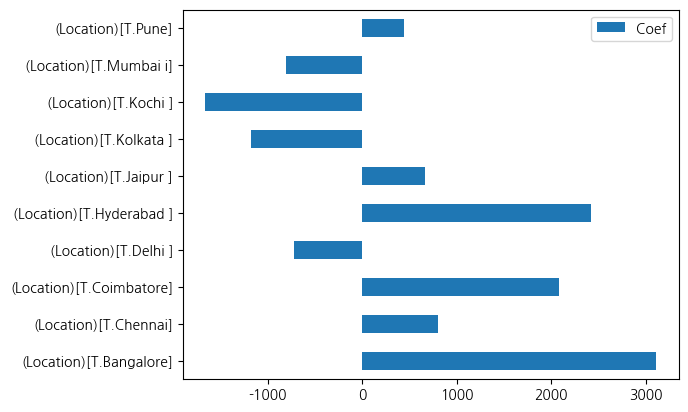

In [208]:
# df_reg_coef = pd.DataFrame({"Coef": reg_result.params.values[1:11]},  
#                            index=[
# '(Location)[T.Bangalore]'  
                               
# ,'(Location)[T.Chennai]'    
                               
# ,'(Location)[T.Coimbatore]'   
                               
# ,'(Location)[T.Delhi ]'        
                               
# ,'(Location)[T.Hyderabad ]'    
                               
# ,'(Location)[T.Jaipur ]'  
                               
# ,'(Location)[T.Kolkata ]'      
                               
# ,'(Location)[T.Kochi ]'    
                               
# ,'(Location)[T.Mumbai i]'    
                               
# ,'(Location)[T.Pune]'])
# df_reg_coef.plot.barh(y = "Coef")

- Bangalore, Chennai, Coimbatore, Hyderabad, Jaipur, Pune: ÏñëÏàòÏùò ÌöåÍ∑Ä Í≥ÑÏàò

-> Ï§ëÍ≥†Ï∞® Í∞ÄÍ≤©Ïóê Í∏çÏ†ïÏ†ÅÏù∏ ÏòÅÌñ•ÏùÑ ÎØ∏Ïπ©ÎãàÎã§.

-> Ïù¥ ÎèÑÏãúÎì§Ïóê ÏúÑÏπòÌïú Ï§ëÍ≥†Ï∞®Îäî Î≥¥Îã§ ÎÜíÏùÄ Í∞ÄÍ≤©ÏúºÎ°ú Í±∞ÎûòÎê† Í∞ÄÎä•ÏÑ±Ïù¥ ÏûàÏäµÎãàÎã§.

- Delhi, Kochi, Kolkata, Mumbai: ÏùåÏàòÏùò ÌöåÍ∑Ä Í≥ÑÏàò

-> Ï§ëÍ≥†Ï∞® Í∞ÄÍ≤©Ïóê Î∂ÄÏ†ïÏ†ÅÏù∏ ÏòÅÌñ•ÏùÑ ÎØ∏Ïπ©ÎãàÎã§

-> Ïù¥ ÎèÑÏãúÎì§Ïóê ÏúÑÏπòÌïú Ï§ëÍ≥†Ï∞®Îäî Îã§Î•∏ ÎèÑÏãúÏóê ÎπÑÌï¥ ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÎÇÆÏùÄ Í∞ÄÍ≤©ÏúºÎ°ú Í±∞ÎûòÎê† Í∞ÄÎä•ÏÑ±Ïù¥ ÏûàÏäµÎãàÎã§. 

## Î∏åÎûúÎìúÎ≥Ñ ÏòÅÌñ•Î†• Î∂ÑÏÑù

<Axes: >

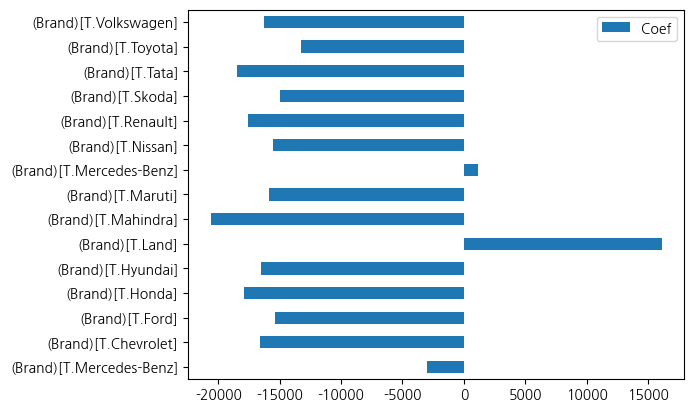

In [210]:
# df_reg_coef = pd.DataFrame({"Coef": reg_result.params.values[11:26]},  
#                            index=[  
# '(Brand)[T.Mercedes-Benz]'           
# ,'(Brand)[T.Chevrolet]'     
# ,'(Brand)[T.Ford]'          
# ,'(Brand)[T.Honda]'         
# ,'(Brand)[T.Hyundai]'       
# ,'(Brand)[T.Land]'          
# ,'(Brand)[T.Mahindra]'      
# ,'(Brand)[T.Maruti]'        
# ,'(Brand)[T.Mercedes-Benz]' 
# ,'(Brand)[T.Nissan]'        
# ,'(Brand)[T.Renault]'       
# ,'(Brand)[T.Skoda]'         
# ,'(Brand)[T.Tata]'          
# ,'(Brand)[T.Toyota]'        
# ,'(Brand)[T.Volkswagen]'    
# ])
# df_reg_coef.plot.barh(y = "Coef")

- BMW
: BMW Î∏åÎûúÎìúÏùò ÌöåÍ∑Ä Í≥ÑÏàòÎäî -3003.3145Î°ú ÏùåÏàò 
-> Ïù¥Îäî BMW Î∏åÎûúÎìúÍ∞Ä Ï§ëÍ≥†Ï∞® Í∞ÄÍ≤©ÏùÑ Î∂ÄÏ†ïÏ†ÅÏúºÎ°ú ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎäî Í≤ÉÏùÑ ÎÇòÌÉÄÎÉÖÎãàÎã§.
-> Ï¶â, BMW Î∏åÎûúÎìúÏùò Ï∞®ÎüâÏùÄ Îã§Î•∏ Î∏åÎûúÎìúÏùò Ï∞®ÎüâÏóê ÎπÑÌï¥ ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÎÇÆÏùÄ Í∞ÄÍ≤©ÏúºÎ°ú Í±∞ÎûòÎê† Í∞ÄÎä•ÏÑ±Ïù¥ ÏûàÏäµÎãàÎã§.


- Chevrolet, Ford, Honda, Hyundai, Mahindra, Maruti, Nissan, Renault, Skoda, Tata, Toyota, Volkswagen
: Ïù¥Îì§ Î∏åÎûúÎìúÏùò ÌöåÍ∑Ä Í≥ÑÏàòÎäî Î™®Îëê ÏùåÏàòÏûÖÎãàÎã§. 
-> Ïù¥Îäî Ïù¥Îü¨Ìïú Î∏åÎûúÎìúÏùò Ï∞®ÎüâÏù¥ Ï§ëÍ≥†Ï∞® Í∞ÄÍ≤©Ïóê Î∂ÄÏ†ïÏ†ÅÏù∏ ÏòÅÌñ•ÏùÑ ÎØ∏ÏπúÎã§Îäî Í≤ÉÏùÑ ÏùòÎØ∏Ìï©ÎãàÎã§. 
-> Îî∞ÎùºÏÑú Ïù¥Îü¨Ìïú Î∏åÎûúÎìúÏùò Ï∞®ÎüâÏùÄ Îã§Î•∏ Î∏åÎûúÎìúÏùò Ï∞®ÎüâÏóê ÎπÑÌï¥ ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÎÇÆÏùÄ Í∞ÄÍ≤©ÏúºÎ°ú Í±∞ÎûòÎê† Í∞ÄÎä•ÏÑ±Ïù¥ ÏûàÏäµÎãàÎã§.


- Land, Mercedes-Benz
: Land RoverÏôÄ Mercedes-Benz Î∏åÎûúÎìúÏùò ÌöåÍ∑Ä Í≥ÑÏàòÎäî ÏñëÏàòÏûÖÎãàÎã§. 
-> Ïù¥Îäî Ïù¥Îü¨Ìïú Î∏åÎûúÎìúÏùò Ï∞®ÎüâÏù¥ Ï§ëÍ≥†Ï∞® Í∞ÄÍ≤©ÏùÑ Í∏çÏ†ïÏ†ÅÏúºÎ°ú ÏòÅÌñ•ÏùÑ ÎØ∏ÏπúÎã§Îäî Í≤ÉÏùÑ ÏùòÎØ∏Ìï©ÎãàÎã§. 
-> Ï¶â, Ïù¥Îü¨Ìïú Î∏åÎûúÎìúÏùò Ï∞®ÎüâÏùÄ Îã§Î•∏ Î∏åÎûúÎìúÏùò Ï∞®ÎüâÏóê ÎπÑÌï¥ ÎÜíÏùÄ Í∞ÄÍ≤©ÏúºÎ°ú Í±∞ÎûòÎê† Í∞ÄÎä•ÏÑ±Ïù¥ ÏûàÏäµÎãàÎã§.


<Axes: >

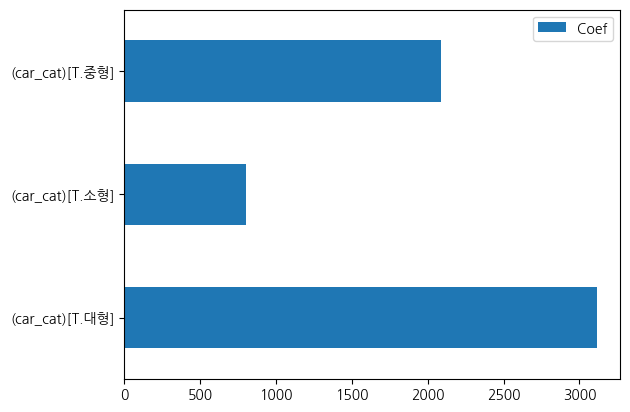

In [201]:
# df_reg_coef = pd.DataFrame({"Coef": reg_result.params.values[1:4]},  
#                            index=[      
# '(car_cat)[T.ÎåÄÌòï]'          
# ,'(car_cat)[T.ÏÜåÌòï]'          
# ,'(car_cat)[T.Ï§ëÌòï]'])
# df_reg_coef.plot.barh(y = "Coef")

- ÎåÄÌòï
: ÎåÄÌòï ÏûêÎèôÏ∞®Ïùò ÌöåÍ∑Ä Í≥ÑÏàòÎäî -1054.2259Î°ú ÏùåÏàòÏûÖÎãàÎã§. 
-> Ïù¥Îäî ÎåÄÌòï ÏûêÎèôÏ∞®Í∞Ä Ï§ëÍ≥†Ï∞® Í∞ÄÍ≤©ÏùÑ Î∂ÄÏ†ïÏ†ÅÏúºÎ°ú ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎäî Í≤ÉÏùÑ ÎÇòÌÉÄÎÉÖÎãàÎã§. 
-> Ï¶â, ÎåÄÌòï ÏûêÎèôÏ∞®Îäî ÏÜåÌòïÏù¥ÎÇò Ï§ëÌòï ÏûêÎèôÏ∞®Ïóê ÎπÑÌï¥ ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÎÇÆÏùÄ Í∞ÄÍ≤©ÏúºÎ°ú Í±∞ÎûòÎê† Í∞ÄÎä•ÏÑ±Ïù¥ ÏûàÏäµÎãàÎã§.

- ÏÜåÌòï 
: ÏÜåÌòï ÏûêÎèôÏ∞®Ïùò ÌöåÍ∑Ä Í≥ÑÏàòÎäî -1823.0796Î°ú ÏùåÏàòÏûÖÎãàÎã§. 
-> Ïù¥Îäî ÏÜåÌòï ÏûêÎèôÏ∞®Í∞Ä Ï§ëÍ≥†Ï∞® Í∞ÄÍ≤©ÏùÑ Î∂ÄÏ†ïÏ†ÅÏúºÎ°ú ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎäî Í≤ÉÏùÑ ÎÇòÌÉÄÎÉÖÎãàÎã§. 
-> Îî∞ÎùºÏÑú ÏÜåÌòï ÏûêÎèôÏ∞®Îäî ÎåÄÌòïÏù¥ÎÇò Ï§ëÌòï ÏûêÎèôÏ∞®Ïóê ÎπÑÌï¥ ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÎÇÆÏùÄ Í∞ÄÍ≤©ÏúºÎ°ú Í±∞ÎûòÎê† Í∞ÄÎä•ÏÑ±Ïù¥ ÏûàÏäµÎãàÎã§.

- Ï§ëÌòï 
: Ï§ëÌòï ÏûêÎèôÏ∞®Ïùò ÌöåÍ∑Ä Í≥ÑÏàòÎäî -3953.4788Î°ú ÏùåÏàòÏûÖÎãàÎã§. 
-> Ïù¥Îäî Ï§ëÌòï ÏûêÎèôÏ∞®Í∞Ä Ï§ëÍ≥†Ï∞® Í∞ÄÍ≤©ÏùÑ Î∂ÄÏ†ïÏ†ÅÏúºÎ°ú ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎäî Í≤ÉÏùÑ ÎÇòÌÉÄÎÉÖÎãàÎã§. 
-> Îî∞ÎùºÏÑú Ï§ëÌòï ÏûêÎèôÏ∞®Îäî ÎåÄÌòïÏù¥ÎÇò ÏÜåÌòï ÏûêÎèôÏ∞®Ïóê ÎπÑÌï¥ ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÎÇÆÏùÄ Í∞ÄÍ≤©ÏúºÎ°ú Í±∞ÎûòÎê† Í∞ÄÎä•ÏÑ±Ïù¥ ÏûàÏäµÎãàÎã§.

<Axes: >

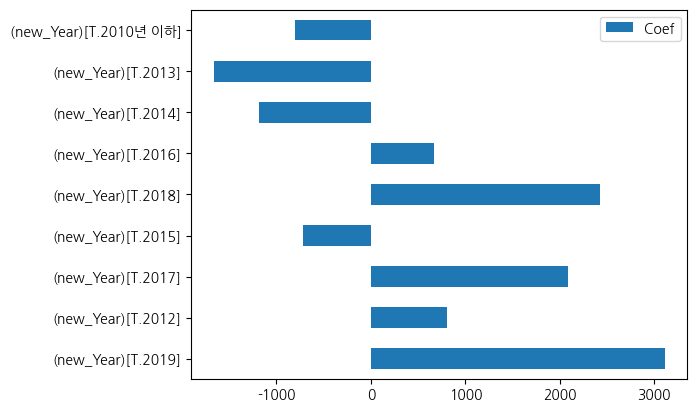

In [206]:
# df_reg_coef = pd.DataFrame({"Coef": reg_result.params.values[1:10]},  
#                            index=[                
# '(new_Year)[T.2019]'       
# ,'(new_Year)[T.2012]'      
# ,'(new_Year)[T.2017]'       
# ,'(new_Year)[T.2015]'       
# ,'(new_Year)[T.2018]'       
# ,'(new_Year)[T.2016]'       
# ,'(new_Year)[T.2014]'       
# ,'(new_Year)[T.2013]'       
# ,'(new_Year)[T.2010ÎÖÑ Ïù¥Ìïò]'])
# df_reg_coef.plot.barh(y = "Coef")

- 2018ÎÖÑÍ≥º 2019ÎÖÑÏóêÎäî ÎààÏóê ÎùÑÍ≤å ÌÅ∞ Í∏çÏ†ïÏ†ÅÏù∏ ÏòÅÌñ•ÏùÑ Ï§Ä Í≤ÉÏúºÎ°ú ÎÇòÌÉÄÎÇúÎã§.


- 2013ÎÖÑÍ≥º 2014ÎÖÑÏùÄ Ï§ëÍ≥†Ï∞® Í∞ÄÍ≤©Ïóê Î∂ÄÏ†ïÏ†ÅÏù∏ ÏòÅÌñ•ÏùÑ Ï£ºÏóàÏùå

<Axes: >

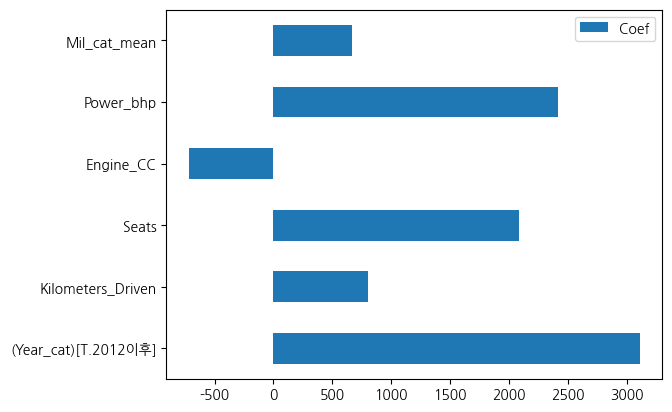

In [199]:
# df_reg_coef = pd.DataFrame({"Coef": reg_result.params.values[1:7]},  
# ,index = log_model.exog_names[1:
# df_reg_coef.plot.barh(y = "Coef")

<Axes: >

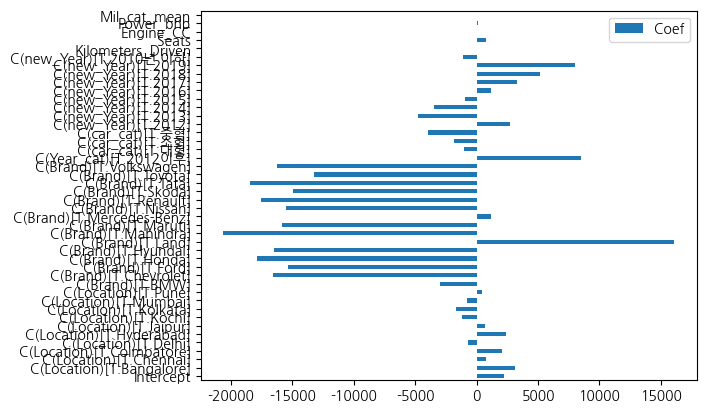

In [213]:
df_reg_coef = pd.DataFrame({"Coef": reg_result.params.values}, index=reg_result.params.index)
df_reg_coef.plot.barh(y="Coef")

## Îã§Ï§ëÏÑ†ÌòïÌöåÍ∑Ä Ìï¥ÏÑù

<Axes: >

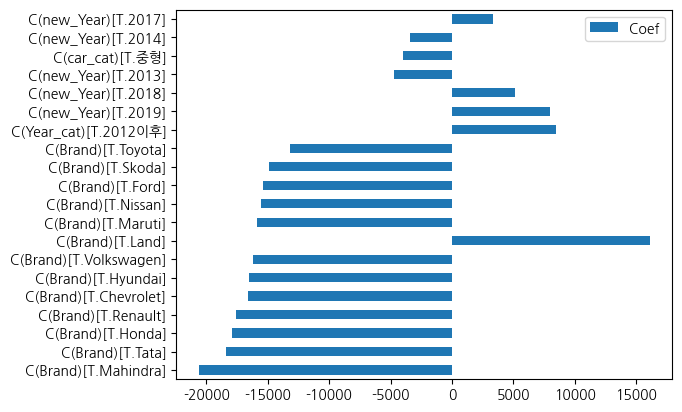

In [223]:
import pandas as pd

# Ï£ºÏñ¥ÏßÑ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
df_reg_coef = pd.DataFrame({"Coef": reg_result.params.values}, index=reg_result.params.index)

# Coef Í∞íÏùò Ï†àÎåìÍ∞íÏùÑ Í∏∞Ï§ÄÏúºÎ°ú ÎÇ¥Î¶ºÏ∞®Ïàú Ï†ïÎ†¨ ÌõÑ ÏÉÅÏúÑ 20Í∞ú ÏÑ†ÌÉù
top_20_variables = df_reg_coef['Coef'].abs().nlargest(20)

# ÏÑ†ÌÉùÎêú Î≥ÄÏàòÎ°ú DataFrame ÏÉùÏÑ±
df_top_20_variables = df_reg_coef.loc[top_20_variables.index]

# ÏÉÅÏúÑ 20Í∞ú Î≥ÄÏàòÏóê ÎåÄÌïú Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
df_top_20_variables.plot.barh(y="Coef")

1) ÏÉÅÏúÑ20Í∞ú Îç∞Ïù¥ÌÑ∞Î•º Í∑∏ÎûòÌîÑÎ°ú ÏãúÍ∞ÅÌôî Ìïú Í≤∞Í≥º, Ï§ëÍ≥†Ï∞® Í∞ÄÍ≤©Ïóê ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎäî Ï£ºÏöî ÏöîÏù∏ÏúºÎ°úÎäî Î∏åÎûúÎìú, Ïó∞Ïãù, Ï∞®ÎüâÏùò Ï¢ÖÎ•ò Îì±Ïù¥ ÏûàÎã§Í≥† Î≥º Ïàò ÏûàÏùå.

2) LandÎ∏åÎûúÎìúÎäî Ï§ëÍ≥†Ï∞® ÏãúÏû•ÏóêÏÑú (1.61e+04 )Î°ú ÎÜíÏùÄ Í∞ÄÍ≤©ÎåÄÏùò Ï∞®ÎüâÏùÑ ÎÇòÌÉÄÎÇ¥Îäî Î∞òÎ©¥, MahindraÎ∏åÎûúÎìúÎäî (-2.061e+04)Î°ú Ï§ëÍ≥†Ï∞® ÏãúÏû•ÏóêÏÑú ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÎÇÆÏùÄ Í∞ÄÍ≤©ÎåÄÏùò Ï∞®ÎüâÏùÑ ÎÇòÌÉÄÎÉÑ. 

3) new_Year(2017), new_Year(2018), Í∑∏Î¶¨Í≥† new_Year(2019)Í∞Ä Î™®Îëê ÏñëÏùò ÌöåÍ∑Ä Í≥ÑÏàòÎ•º Í∞ÄÏßÄÍ≥† ÏûàÏúºÎØÄÎ°ú, Ïù¥Îì§ÏùÄ Ï§ëÍ≥†Ï∞®Ïùò Ïó∞ÏãùÏù¥ Ï¶ùÍ∞ÄÌï®Ïóê Îî∞Îùº Ï§ëÍ≥†Ï∞®Ïùò Í∞ÄÍ≤©Ïù¥ ÏÉÅÏäπÌïúÎã§Îäî Í≤ÉÏùÑ Ïïå Ïàò ÏûàÏùå. 

4) Ï∞®ÎüâÏùò Ï¢ÖÎ•òÎäî Ï§ëÌòïÏù¥ ÏùåÏùò Í≥ÑÏàòÎ°ú Í∞ÄÏû• ÎÜíÏùÄ ÏòÅÌñ•ÏùÑ Îùî. Ï§ëÌòï Ï∞®ÎüâÏùò ÌÅ¨Í∏∞Í∞Ä Ï§ëÍ≥†Ï∞®Ïùò Í∞ÄÍ≤©Ïóê Î∂ÄÏ†ïÏ†ÅÏù∏ ÏòÅÌñ•ÏùÑ ÎØ∏ÏπúÎã§Îäî Í≤ÉÏùÑ Ïïå Ïàò ÏûàÏùå